### Example reconstruction

In [1]:
## Import functions and initialize data
import numpy as np
import matplotlib.pyplot as plt
from Reconstruction import *

In [2]:
# Get test data and generate projections
data = TestData.molecule(16)
orientations = np.random.uniform([-np.pi,-np.pi/2,-np.pi],[np.pi,np.pi/2,np.pi],(1000,3))

# Intiate Reconstructor object
R = Reconstructor(Projector(data,orientations).project(),orientations)

2024-06-02 15:50:54,583 INFO [aspire.volume.volume] C:\Users\Leon\AppData\Local\ASPIRE-data\ASPIRE-data\Cache\emdb_2660.map with dtype float32 loaded as None


In [3]:
# Perform reconstruction
recon, info = R.reconstruct('lscg',maxiter=1000,store_iters=False)

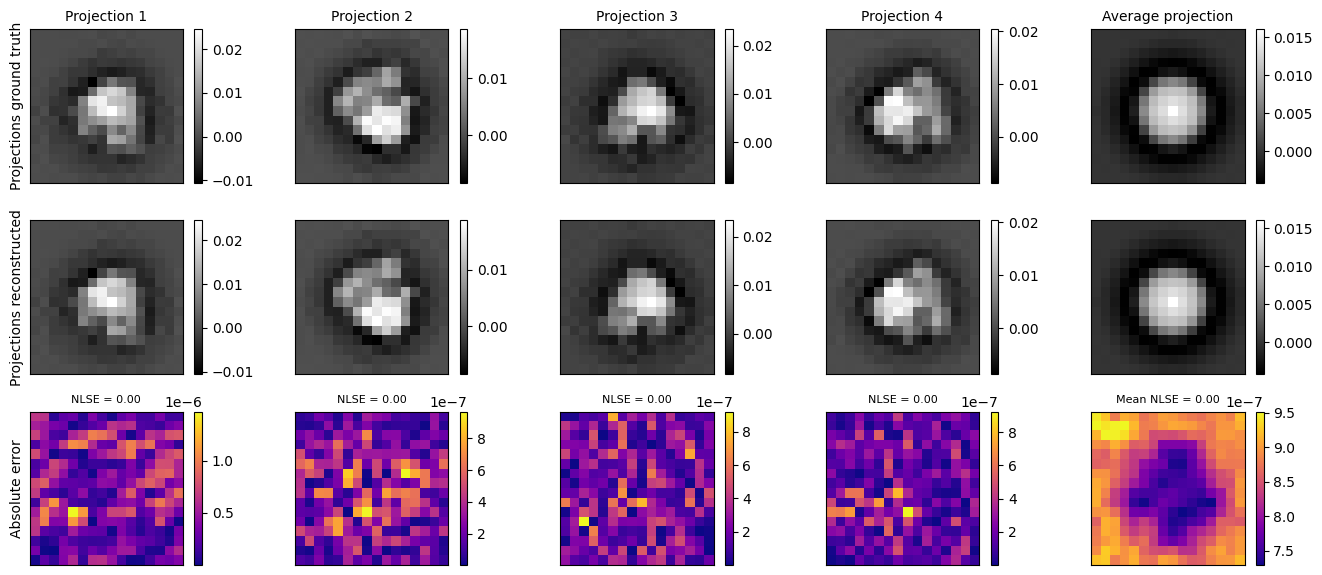

In [5]:
# Visualize results
Inspect.plot_3d_recon(data,recon);

# Results

### Noisy projections

#### 3D

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from Reconstruction import *

res = 16       # volume resolution
ndim = 3       # dimensionality
seeds = [0,2,4,5]
shapes = ["rect","gauss","molecule"]
deltas = np.logspace(-6,1,8)

In [63]:
orientations = np.random.uniform([-np.pi,-np.pi/2,-np.pi],[np.pi,np.pi/2,np.pi],size=(1000,3))

LSE1 = np.empty((len(shapes),len(seeds),len(deltas)))*np.nan
LSE2 = LSE1.copy()
INFO1 = np.empty(LSE1.shape,dtype=dict)
INFO2 = INFO1.copy()

for n, name in enumerate(shapes):
    for s, seed in enumerate(seeds):
        if name == 'molecule' and s>0: break
        else: data = eval(f"TestData.{name}(res,ndim=ndim,seed=seed)")
        projections = Projector(data,orientations).project()
        
        for i, delta in enumerate(deltas):
            #np.random.seed(seed)
            R = Reconstructor(projections + delta*data.std()*np.random.normal(0,1,(1000,16,16)), orientations)
            
            recons1, INFO1[n,s,i] = R.reconstruct(method='lscg', maxiter=100, store_iters=True)
            LSE1[n,s,i] = Inspect.nLSE(data,recons1)
            
            recons, INFO2[n,s,i] = R.reconstruct(method='dfi', maxiter=100)
            LSE2[n,s,i] = Inspect.nLSE(data,recons)
            print(n,s,i,end='\r') 
    
    #np.save(f"{ndim}Drecon_noise_LSCG_res{res}_maxit{100}_delta-logspace-6to1in8.npy",LSE1)
    #np.save(f"{ndim}Drecon_noise_DFI_res{res}_maxit{100}_delta-logspace-6to1in8.npy",LSE2)
    #np.save(f"{ndim}Drecon_noise-INFO_LSCG_res{res}_maxit{100}_delta-logspace-6to1in8.npy",INFO1)
    #np.save(f"{ndim}Drecon_noise-INFO_DFI_res{res}_maxit{100}_delta-logspace-6to1in8.npy",INFO2)

CG did not converge within maximum number of iterations 100


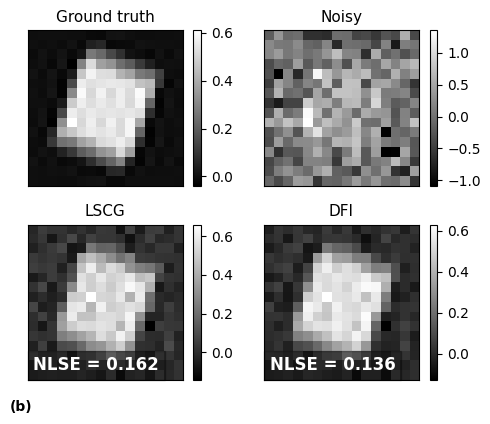

In [66]:
r1 = recons1#INFO1[0,0,0]['intermediate'][1]
r2 = recons
p = 70
fig,ax = plt.subplots(2,2,figsize=(5,4))
i=ax[0,0].imshow(Projector(data,R.orientations[p].reshape(1,3)).project()[0],cmap='gray'); plt.colorbar(i,ax=ax[0,0]); ax[0,0].set_xticks([]); ax[0,0].set_yticks([])
i=ax[0,1].imshow(R.projections[p],cmap='gray'); plt.colorbar(i,ax=ax[0,1]); ax[0,1].set_xticks([]); ax[0,1].set_yticks([])
i=ax[1,0].imshow(Projector(r1,R.orientations[p].reshape(1,3)).project()[0],cmap='gray'); plt.colorbar(i,ax=ax[1,0]); ax[1,0].set_xticks([]); ax[1,0].set_yticks([])
i=ax[1,1].imshow(Projector(r2,R.orientations[p].reshape(1,3)).project()[0],cmap='gray'); plt.colorbar(i,ax=ax[1,1]); ax[1,1].set_xticks([]); ax[1,1].set_yticks([])
ax[0,0].set_title("Ground truth",fontsize=11); ax[0,1].set_title("Noisy",fontsize=11)
ax[1,0].set_title("LSCG",fontsize=11)
ax[1,1].set_title("DFI",fontsize=11)
plt.tight_layout()
plt.gcf().text(0.02,-0.04,'(b)',fontweight='bold')
kw = {"fontsize":12,"ha":'left',"color":'white',"backgroundcolor":(0,0,0,0.3),"fontweight":'bold'}
ax[1,0].text(0.1,14.5,fr"NLSE = {Inspect.nLSE(Projector(data,R.orientations[p].reshape(1,3)).project()[0], Projector(r1,R.orientations[p].reshape(1,3)).project()[0]):1.3f}".replace("e-0", "e-"),**kw)
ax[1,1].text(0.1,14.5,fr"NLSE = {Inspect.nLSE(Projector(data,R.orientations[p].reshape(1,3)).project()[0], Projector(r2,R.orientations[p].reshape(1,3)).project()[0]):1.3f}".replace("e-0", "e-"),**kw)
#plt.savefig(r'C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\MAX_noise.pdf',dpi=500,bbox_inches='tight')
plt.show()

In [76]:
SNR = np.empty((len(shapes),len(deltas)))*np.nan
for n, name in enumerate(shapes):
    data = eval(f"TestData.{name}(res,ndim=ndim,seed=seed)")
    SNR[n,:] = 10*np.log10(np.mean(Projector(data,orientations).project()**2)/(deltas*data.std())**2) # in dB

2024-05-31 13:58:07,762 INFO [aspire.volume.volume] C:\Users\Leon\AppData\Local\ASPIRE-data\ASPIRE-data\Cache\emdb_2660.map with dtype float32 loaded as None


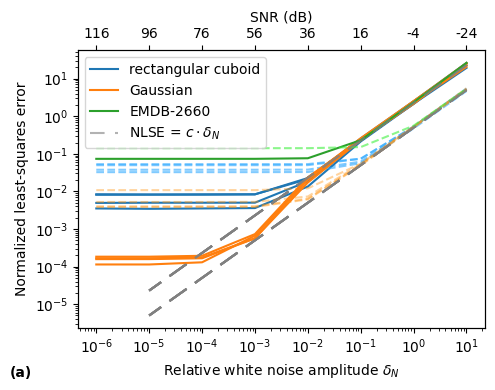

In [92]:
LSE_noise_LSCG = np.load("3Drecon_noise_LSCG_res16_maxit100_delta-logspace-6to1in8.npy")
LSE_noise_DFI  = np.load("3Drecon_noise_DFI_res16_maxit100_delta-logspace-6to1in8.npy")

plt.figure(figsize=(5,4))#,dpi=500)
for n, (shape,lseau_lscg,lseau_dfi) in enumerate(zip(["rectangular cuboid","Gaussian","EMDB-2660"],LSE_noise_LSCG,LSE_noise_DFI)):
    for s, (lseau_s_lscg, lseau_s_dfi) in enumerate(zip(lseau_lscg,lseau_dfi)):
        if not np.isnan(lseau_s_lscg).all() and not np.isnan(lseau_s_dfi).all():
            plt.loglog(deltas,lseau_s_lscg,c=f'C{n}',ls='-',label=shape if s==0 else None)
            plt.loglog(deltas,lseau_s_dfi,c=['#2ba8ff','#ff930e','#3ef03e'][n],ls='--',alpha=[0.6,0.4,0.6][n])
            plt.loglog(deltas[1:],0.5*deltas[1:],c='grey',alpha=0.6,ls=(3,(10,5)),label=r'NLSE = $c\cdot\delta_N$' if s==0 and n==2 else None)
            plt.loglog(deltas[1:],2.3*deltas[1:],c='grey',alpha=0.6,ls=(3,(10,5)))
ax1 = plt.gca()
plt.xlabel(r"Relative white noise amplitude $\delta_N$")
plt.ylabel("Normalized least-squares error")
plt.legend()
plt.gcf().text(0.02,0.045,'(a)',fontweight='bold')
ax2 = ax1.twiny()
ax2.set_xlim(np.log(ax1.get_xlim()))
ax2.set_xticks(np.log(deltas))
ax2.set_xticklabels(np.round(SNR.mean(axis=0),0).astype(int))
ax2.set_xlabel("SNR (dB)")
plt.tight_layout()
#plt.savefig(r'C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\nLSE-vs-noise.pdf',dpi=500)
plt.show()

-----

### Orientation estimation uncertainty

#### 3D

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from Reconstruction import *

res = 16       # volume resolution
ndim = 3       # dimensionality
Nstep = 19
seeds = [0,2,4,5]
shapes = ["rect","gauss","molecule"]
deltas = np.logspace(-6,1,8)*np.pi

In [60]:
np.random.seed(42)
normal = np.random.normal([0,0,0],[1,1/2,1],(1000,3))
orientations = np.random.uniform([-np.pi,-np.pi/2,-np.pi],[np.pi,np.pi/2,np.pi],size=(1000,3))

LSE1 = np.empty((len(shapes),len(seeds),len(deltas)))*np.nan
LSE2 = LSE1.copy()
INFO1 = np.empty(LSE1.shape,dtype=dict)
INFO2 = INFO1.copy()

for n, name in enumerate(shapes):
    for s, seed in enumerate(seeds):
        if name == 'molecule' and s>0: break
        else: data = eval(f"TestData.{name}(res,ndim=ndim,seed=seed)")
        projections = Projector(data,orientations).project()
        
        for i, delta in enumerate(deltas):
            np.random.seed(seed)
            R = Reconstructor(projections, orientations + delta*normal)
            
            recons, INFO1[n,s,i] = R.reconstruct(method='lscg', maxiter=1000, store_iters=True)
            LSE1[n,s,i] = Inspect.nLSE(data,recons)
            
            recons, INFO2[n,s,i] = R.reconstruct(method='dfi', maxiter=1000)
            LSE2[n,s,i] = Inspect.nLSE(data,recons)
            print(n,s,i,end='\r')

    np.save(f"{ndim}Drecon_angularUncertainty42_LSCG_res{res}_delta-pi-logspace-6to1in8.npy",LSE1)
    p.save(f"{ndim}Drecon_angularUncertainty42_DFI_res{res}_delta-pi-logspace-6to1in8.npy",LSE2)
    np.save(f"{ndim}Drecon_angularUncertainty42-INFO_LSCG_res{res}_delta-pi-logspace-6to1in8.npy",INFO1)
    np.save(f"{ndim}Drecon_angularUncertainty42-INFO_DFI_res{res}_delta-pi-logspace-6to1in8.npy",INFO2)

CG did not converge within maximum number of iterations 1000


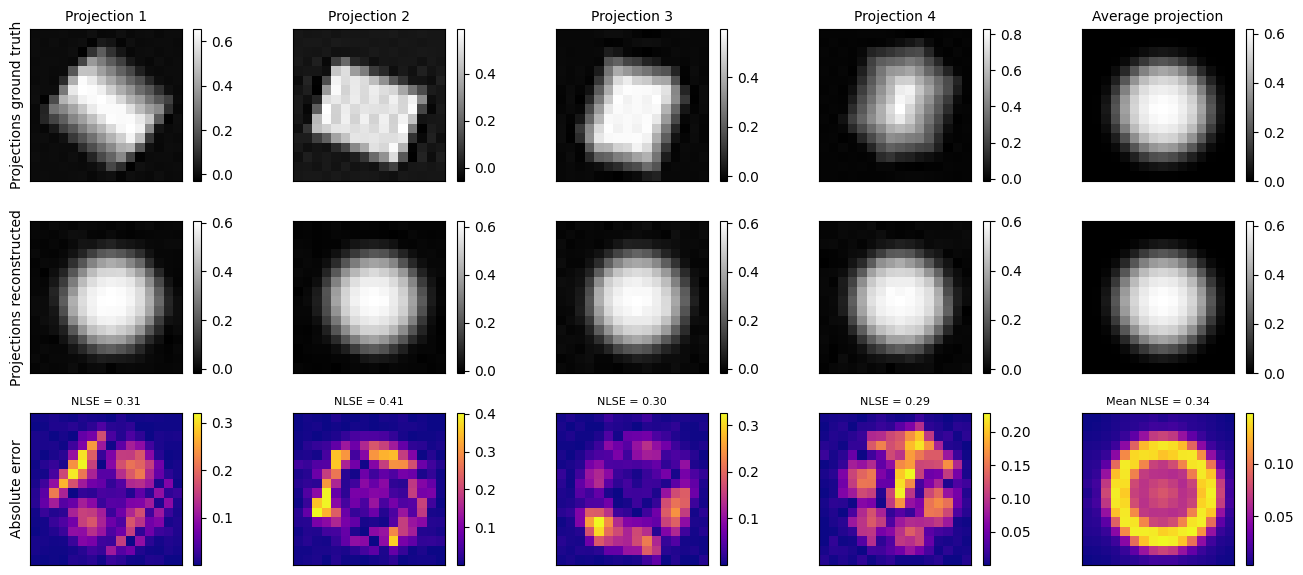

1.2415605141698396

In [69]:
Inspect.plot_3d_recon(data,recons)
Inspect.nLSE(data,recons)

0.53435466625609

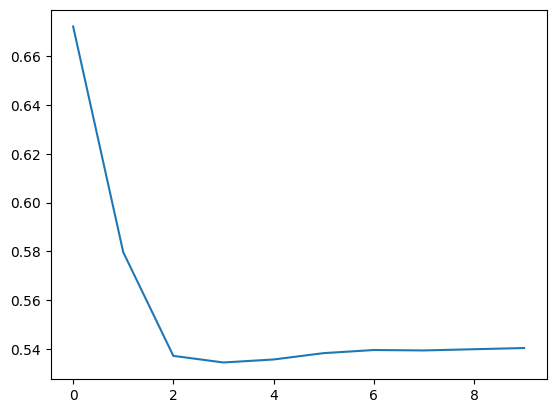

In [85]:
plt.plot(Inspect.nLSE(data,np.array(INFO1[0,0,0]['intermediate']),axis=(1,2,3))[:100])
np.argmin(Inspect.nLSE(data,np.array(INFO1[0,0,0]['intermediate']),axis=(1,2,3)))
Inspect.nLSE(data,INFO1[0,0,0]['intermediate'][3])

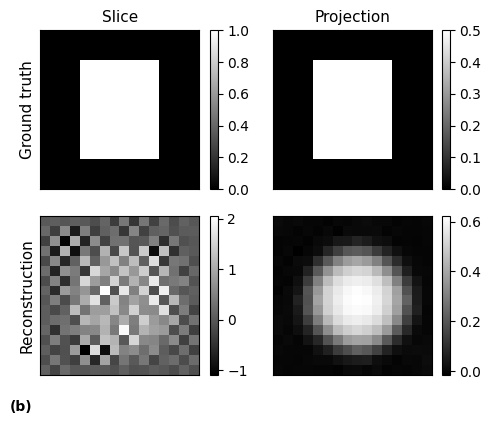

In [98]:
r = recons#INFO1[0,0,0]['intermediate'][3]

fig,ax = plt.subplots(2,2,figsize=(5,4))
i=ax[0,0].imshow(data[8],cmap='gray'); plt.colorbar(i,ax=ax[0,0]); ax[0,0].set_xticks([]); ax[0,0].set_yticks([])
i=ax[0,1].imshow(data.mean(axis=0),cmap='gray'); plt.colorbar(i,ax=ax[0,1]); ax[0,1].set_xticks([]); ax[0,1].set_yticks([])
i=ax[1,0].imshow(r[8],cmap='gray'); plt.colorbar(i,ax=ax[1,0]); ax[1,0].set_xticks([]); ax[1,0].set_yticks([])
i=ax[1,1].imshow(r.mean(axis=0),cmap='gray'); plt.colorbar(i,ax=ax[1,1]); ax[1,1].set_xticks([]); ax[1,1].set_yticks([])
ax[0,0].set_title("Slice",fontsize=11); ax[0,1].set_title("Projection",fontsize=11)
ax[0,0].set_ylabel("Ground truth",fontsize=11)
ax[1,0].set_ylabel("Reconstruction",fontsize=11)
plt.tight_layout()
plt.gcf().text(0.02,-0.04,'(b)',fontweight='bold')
plt.savefig(r'C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\MAX_OrientationEstimationError_checkerboard-slice_sphere-projection.pdf',dpi=500,bbox_inches='tight')
plt.show()

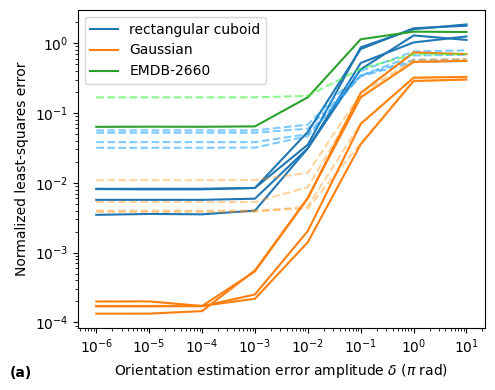

In [21]:
LSE_angUnc_LSCG = np.load("3Drecon_angularUncertainty42_LSCG_res16_delta-pi-logspace-6to1in8.npy")
LSE_angUnc_DFI  = np.load("3Drecon_angularUncertainty42_DFI_res16_delta-pi-logspace-6to1in8.npy")

plt.figure(figsize=(5,4))#,dpi=500)
for n, (shape,lseau_lscg,lseau_dfi) in enumerate(zip(["rectangular cuboid","Gaussian","EMDB-2660"],LSE_angUnc_LSCG,LSE_angUnc_DFI)):
    for s, (lseau_s_lscg, lseau_s_dfi) in enumerate(zip(lseau_lscg,lseau_dfi)):
        if not np.isnan(lseau_s_lscg).all() and not np.isnan(lseau_s_dfi).all():
            #plt.loglog(deltas/np.pi,lseau_s_lscg,c=f'C{n}',ls=['-','--','-.',':'][s],label=shape if s==0 else None)
            #plt.loglog(deltas/np.pi,lseau_s_dfi,c=f'C{n}',ls=['-','--','-.',':'][s],alpha=0.4)
            plt.loglog(deltas/np.pi,lseau_s_lscg,c=f'C{n}',ls='-',label=shape if s==0 else None)
            plt.loglog(deltas/np.pi,lseau_s_dfi,c=['#2ba8ff','#ff930e','#3ef03e'][n],ls='--',alpha=[0.6,0.4,0.6][n])

plt.xlabel(r"Orientation estimation error amplitude $\delta$ ($\pi$ rad)")
plt.ylabel("Normalized least-squares error")
plt.legend()
plt.gcf().text(0.02,0.045,'(a)',fontweight='bold')
plt.tight_layout()
plt.savefig(r'C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\nLSE-vs-OrientationEstimationError.pdf',dpi=500)
plt.show()

-----

### Number of projections

#### 3D

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from Reconstruction import *

res = 16      # volume resolution
ndim = 3      # dimensionality
Nstep = 7
seeds = [0,2,4,5]
shapes = ["rect","gauss","molecule"]
n_rots = np.logspace(1,3.4,Nstep,dtype=int)

In [139]:
err = np.empty((2,len(shapes),len(seeds),Nstep))*np.nan
max_iters = np.zeros((len(shapes),len(seeds),Nstep))

for n, name in enumerate(shapes):
    for s, seed in enumerate(seeds):
        if name in ["molecule"]:
            if s>0: break
            else: data = eval(f"TestData.{name}(res)")
        else: 
            data = eval(f"TestData.{name}(res,ndim=ndim,seed=seed)")

        for i, nrot in enumerate(n_rots):
            np.random.seed(seed)
            orientations = np.random.uniform([-np.pi,-np.pi/2,-np.pi],[np.pi,np.pi/2,np.pi],size=(nrot,3))
            R = Reconstructor(Projector(data, orientations).project(), orientations)
            
            recons1, INFO1 = R.reconstruct(method='LSCG', maxiter=1000, store_iters=True)
            err[0,n,s,i] = Inspect.nLSE(data, recons1)
            max_iters[n,s,i] = INFO1['niter']
            recons, _ = R.reconstruct(method='DFI', maxiter=INFO1['niter'])
            err[1,n,s,i] = Inspect.nLSE(data, recons)
            print(err[1,n,s,i])
            
            print(n,s,i,end='\r')

        #np.save(f"3Drecon_nrot_EarlyStopCG-DFI_LSE_LSCG-and-DFI_res{res}_nrot-logspace1to3dot4in{Nstep}.npy",err)

0.12006459865177789


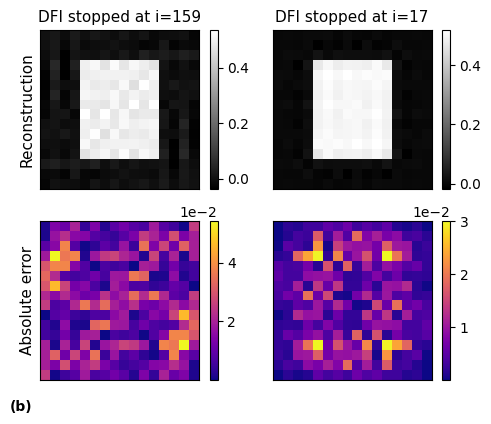

In [154]:
r = recons#INFO1['intermediate'][170]
r1 = recons1
fig,ax = plt.subplots(2,2,figsize=(5,4))
i=ax[0,0].imshow(r1.mean(axis=0),cmap='gray'); plt.colorbar(i,ax=ax[0,0]); ax[0,0].set_xticks([]); ax[0,0].set_yticks([])
i=ax[0,1].imshow(r.mean(axis=0),cmap='gray'); plt.colorbar(i,ax=ax[0,1]); ax[0,1].set_xticks([]); ax[0,1].set_yticks([])
i=ax[1,0].imshow(np.abs(data.mean(axis=0)-r1.mean(axis=0)),cmap='plasma'); cbar = plt.colorbar(i,ax=ax[1,0]); cbar.formatter.set_powerlimits((0, 0)); ax[1,0].set_xticks([]); ax[1,0].set_yticks([])
i=ax[1,1].imshow(np.abs(data.mean(axis=0)-r.mean(axis=0)),cmap='plasma'); cbar = plt.colorbar(i,ax=ax[1,1]); cbar.formatter.set_powerlimits((0, 0)); ax[1,1].set_xticks([]); ax[1,1].set_yticks([])
ax[0,0].set_title("DFI stopped at i=159",fontsize=11); ax[0,1].set_title("DFI stopped at i=17",fontsize=11)
ax[0,0].set_ylabel("Reconstruction",fontsize=11)
ax[1,0].set_ylabel("Absolute error",fontsize=11)
plt.tight_layout()
plt.gcf().text(0.02,-0.04,'(b)',fontweight='bold')
plt.subplots_adjust(hspace=0.2)
#plt.savefig(r'C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\MAX_nroterror_LSCGvDFI.pdf',dpi=500,bbox_inches='tight')
plt.show()

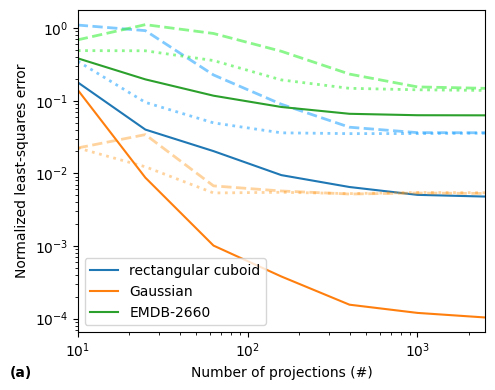

In [161]:
err_N1 = np.load("3Drecon_nrot_LSE_LSCG-and-DFI_res16_nrot-logspace1to3dot4in7.npy")
err_N = np.load("3Drecon_nrot_EarlyStopCG-DFI_LSE_LSCG-and-DFI_res16_nrot-logspace1to3dot4in7.npy")

plt.figure(figsize=(5,4))#,dpi=500)
for n, label in enumerate(['rectangular cuboid','Gaussian','EMDB-2660']):
    s = 0 if n != 1 else 3
    if not np.isnan(err_N[0,n,s,:]).all() and not np.isnan(err_N[1,n,s,:]).all():
        plt.loglog(n_rots,err_N1[0,n,s,:],c=f'C{n}',ls='-',label=label) # LSCG 
        plt.loglog(n_rots,err_N1[1,n,s,:],c=['#2ba8ff','#ff930e','#3ef03e'][n],lw=2,ls='--',alpha=[0.6,0.4,0.6][n]) # old DFI 
        plt.loglog(n_rots,err_N[1,n,s,:],c=['#2ba8ff','#ff930e','#3ef03e'][n],lw=2,ls=':',alpha=[0.6,0.4,0.6][n])   # DFI

plt.xlabel(r"Number of projections (#)")
plt.ylabel("Normalized least-squares error")
plt.xlim(10,2500)
plt.legend()
plt.gcf().text(0.02,0.045,'(a)',fontweight='bold')
plt.tight_layout()
#plt.savefig(r'C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\nLSE-vs-NumberProjections.pdf',dpi=500)
plt.show()

#### 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Reconstruction import *

res = 128      # volume resolution
ndim = 2       # dimensionality
Nstep = 19
seeds = [0,2,4,5]
shapes = ["rect","gauss","sl_phantom","camera_man"]
n_rots = np.logspace(1,3.4,Nstep,dtype=int)

In [5]:
recons = np.empty((2,len(shapes),len(seeds),Nstep,res,res))*np.nan
err = np.empty((2,len(shapes),len(seeds),Nstep))*np.nan

for n, name in enumerate(shapes):
    for s, seed in enumerate(seeds):
        if name in ["sl_phantom","camera_man"] and s>0: break
        else: data = eval(f"TestData.{name}(res,ndim=ndim,seed=seed)")

        for i, n_rot in enumerate(n_rots):
            np.random.seed(seed)
            orientations = np.random.uniform(-np.pi/2,np.pi/2,size=(n_rot,))
            R = Reconstructor(Projector(data, orientations).project(), orientations)
            
            recons[0,n,s,i,:], _ = R.reconstruct(method='LSCG', maxiter=1000)
            recons[1,n,s,i,:], _ = R.reconstruct(method='DFI', maxiter=1000)
            err[0,n,s,i] = Inspect.nLSE(data,recons[0,n,s,i,:])
            err[1,n,s,i] = Inspect.nLSE(data,recons[1,n,s,i,:])

            print(n,s,i,end='\r')
            
    np.save(f"2Drecon_nrot_recons_LSCG-and-DFI_res{res}_nrot-logspace1to3dot4in{Nstep}.npy",recons)
    np.save(f"2Drecon_nrot_LSE_LSCG-and-DFI_res{res}_nrot-logspace1to3dot4in{Nstep}.npy",err)

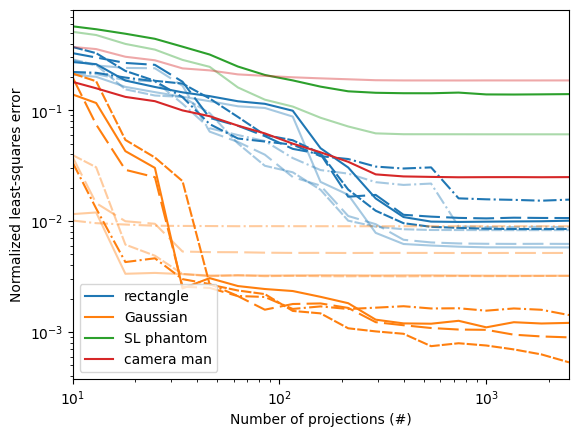

In [7]:
err_N = np.load("2Drecon_nrot_LSE_LSCG-and-DFI_res128_nrot-logspace1to3dot4in19.npy")

for n, label in enumerate(['rectangle','Gaussian','SL phantom','camera man']):
    for s, ls in enumerate(['-',(0,(5,1)),'-.',(0,(10,3))]):
        if not np.isnan(err_N[0,n,s,:]).all() and not np.isnan(err_N[1,n,s,:]).all():
            plt.loglog(n_rots,err_N[0,n,s,:],c=f'C{n}',ls=ls,label=label if s==0 else None) # LSCG 
            plt.loglog(n_rots,err_N[1,n,s,:],c=f'C{n}',ls=ls,alpha=0.4)   # DFI

plt.xlabel(r"Number of projections (#)")
plt.ylabel("Normalized least-squares error")
plt.xlim(10,2500)
plt.legend()
plt.show()

---

### Resolution

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from Reconstruction import *

nrot = 1000
ndim = 3      # dimensionality
Nstep = 6
seeds = [0,2,4,5]
shapes = ["rect","gauss","molecule"]
ress = (2**np.linspace(2,7,Nstep)).astype(int)

In [53]:
np.random.seed(42)
orientations = np.random.uniform([-np.pi,-np.pi/2,-np.pi],[np.pi,np.pi/2,np.pi],size=(nrot,3))

err = np.empty((2,len(shapes),len(seeds),Nstep))*np.nan

for n, name in enumerate(shapes):
    for s, seed in enumerate(seeds):
        for i, res in enumerate(ress):
            if res>32: break
            if name in ["molecule"]:
                if s>0: break
                else: data = eval(f"TestData.{name}(res)")
            else: 
                data = eval(f"TestData.{name}(res,ndim=ndim,seed=seed)")
            
            R = Reconstructor(Projector(data, orientations).project(), orientations)
        
            #recons1, INFO1 = R.reconstruct(method='LSCG', maxiter=100, store_iters=False)
            #err[0,n,s,i] = Inspect.nLSE(data, recons1)
            
            recons, _ = R.reconstruct(method='DFI', maxiter=100)
            err[1,n,s,i] = Inspect.nLSE(data, recons)
            
            print(n,s,i,end='\r')

        #np.save(f"3Drecon_res_LSE_LSCG-and-DFI_res-2logspace4to128in{Nstep}.npy",err)

C:\Users\Leon\Documents\Python_Scripts\UU\ASPIRE-Python\gallery\tutorials\Reconstruction.py:479: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(np.sum((d-r)**2,axis=axis)/np.sum(d**2))


C:\Users\Leon\Documents\Python_Scripts\UU\ASPIRE-Python\gallery\tutorials\Reconstruction.py:479: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(np.sum((d-r)**2,axis=axis)/np.sum(d**2))


2024-06-01 19:56:37,637 INFO [aspire.volume.volume] C:\Users\Leon\AppData\Local\ASPIRE-data\ASPIRE-data\Cache\emdb_2660.map with dtype float32 loaded as None
2024-06-01 19:56:42,778 INFO [aspire.volume.volume] C:\Users\Leon\AppData\Local\ASPIRE-data\ASPIRE-data\Cache\emdb_2660.map with dtype float32 loaded as None
2024-06-01 19:56:50,994 INFO [aspire.volume.volume] C:\Users\Leon\AppData\Local\ASPIRE-data\ASPIRE-data\Cache\emdb_2660.map with dtype float32 loaded as None
2024-06-01 19:57:21,647 INFO [aspire.volume.volume] C:\Users\Leon\AppData\Local\ASPIRE-data\ASPIRE-data\Cache\emdb_2660.map with dtype float32 loaded as None


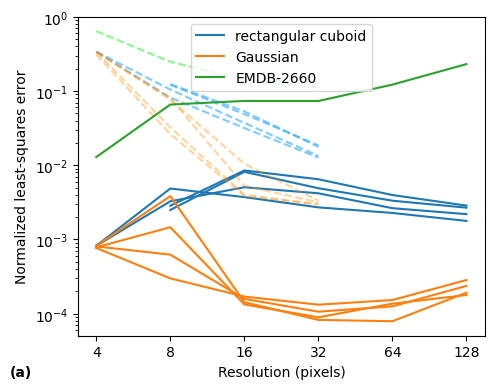

In [59]:
err_r = np.load("3Drecon_res_LSE_LSCG-and-DFI_res-2logspace4to128in6.npy")

plt.figure(figsize=(5,4))#,dpi=500)
for n, label in enumerate(['rectangular cuboid','Gaussian','EMDB-2660']):
    E = err_r
    for s, seed in enumerate(seeds):
        if not np.isnan(E[0,n,s,:]).all():# and not np.isnan(err_r[1,n,s,:]).all():
            plt.loglog(ress,E[0,n,s],c=f'C{n}',ls='-',label=label if s==0 else None) # LSCG 
            plt.loglog(ress,err_r[1,n,s],c=['#2ba8ff','#ff930e','#3ef03e'][n],ls='--',alpha=[0.6,0.4,0.6][n]) # old DFI 

plt.xlabel(r"Resolution (pixels)")
plt.ylabel("Normalized least-squares error")
plt.legend()
plt.gca().set_xticks(ress,ress)#[r'$2^2$',r'$2^3$',r'$2^4$',r'$2^5$',r'$2^6$',r'$2^7$',])
plt.xticks([],minor=True)
plt.gcf().text(0.02,0.045,'(a)',fontweight='bold')
plt.tight_layout()
#plt.savefig(r'C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\nLSE-vs-res.pdf',dpi=500)
plt.show()

### Field of view

#### 3D

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from Reconstruction import *

res = 16      # volume resolution
ndim = 3       # dimensionality
Nstep = 7
seeds = [2]#[0,2,4,5]
shapes = ["rect","gauss","molecule"]
nrot = 1000
PHISx, PHISy, PHISz = np.mgrid[0:np.pi:Nstep*1j,0:np.pi/2:int(np.ceil(Nstep/2))*1j,0:np.pi:Nstep*1j]

In [3]:
err = np.empty((2,len(shapes),len(seeds),)+PHISx.shape)

for n, name in enumerate(shapes):
    for s, seed in enumerate(seeds):
        if name in ["molecule"] and s>0: break
        else: data = eval(f"TestData.{name}(res,ndim=ndim,seed=seed)")

        for i in range(PHISx.shape[0]):
            for j in range(PHISy.shape[1]):
                for k in range(PHISz.shape[2]):
                    np.random.seed(seed)
                    angs = np.array([PHISx[i,j,k],PHISy[i,j,k],PHISz[i,j,k]])
                    orientations = np.random.uniform(-angs,angs,size=(nrot,3))
                    R = Reconstructor(Projector(data, orientations).project(), orientations)
                    
                    recons, _ = R.reconstruct(method='LSCG', maxiter=100)
                    err[0,n,s,i,j,k] = Inspect.nLSE(data, recons)
                    
                    recons, _ = R.reconstruct(method='DFI', maxiter=100)
                    err[1,n,s,i,j,k] = Inspect.nLSE(data, recons)

                    print(n,s,i,j,k,end='\r')

    np.save(f"3Drecon_FOV_LSE_LSCG-and-DFI_res{res}_phis-linspace0toHalfPIin{Nstep}.npy",err)

CG did not converge within maximum number of iterations 100
CG did not converge within maximum number of iterations 100
CG did not converge within maximum number of iterations 100
CG did not converge within maximum number of iterations 100
CG did not converge within maximum number of iterations 100
CG did not converge within maximum number of iterations 100
CG did not converge within maximum number of iterations 100
CG did not converge within maximum number of iterations 100
CG did not converge within maximum number of iterations 100
CG did not converge within maximum number of iterations 100
CG did not converge within maximum number of iterations 100
CG did not converge within maximum number of iterations 100
CG did not converge within maximum number of iterations 100
CG did not converge within maximum number of iterations 100
CG did not converge within maximum number of iterations 100
CG did not converge within maximum number of iterations 100
CG did not converge within maximum numbe

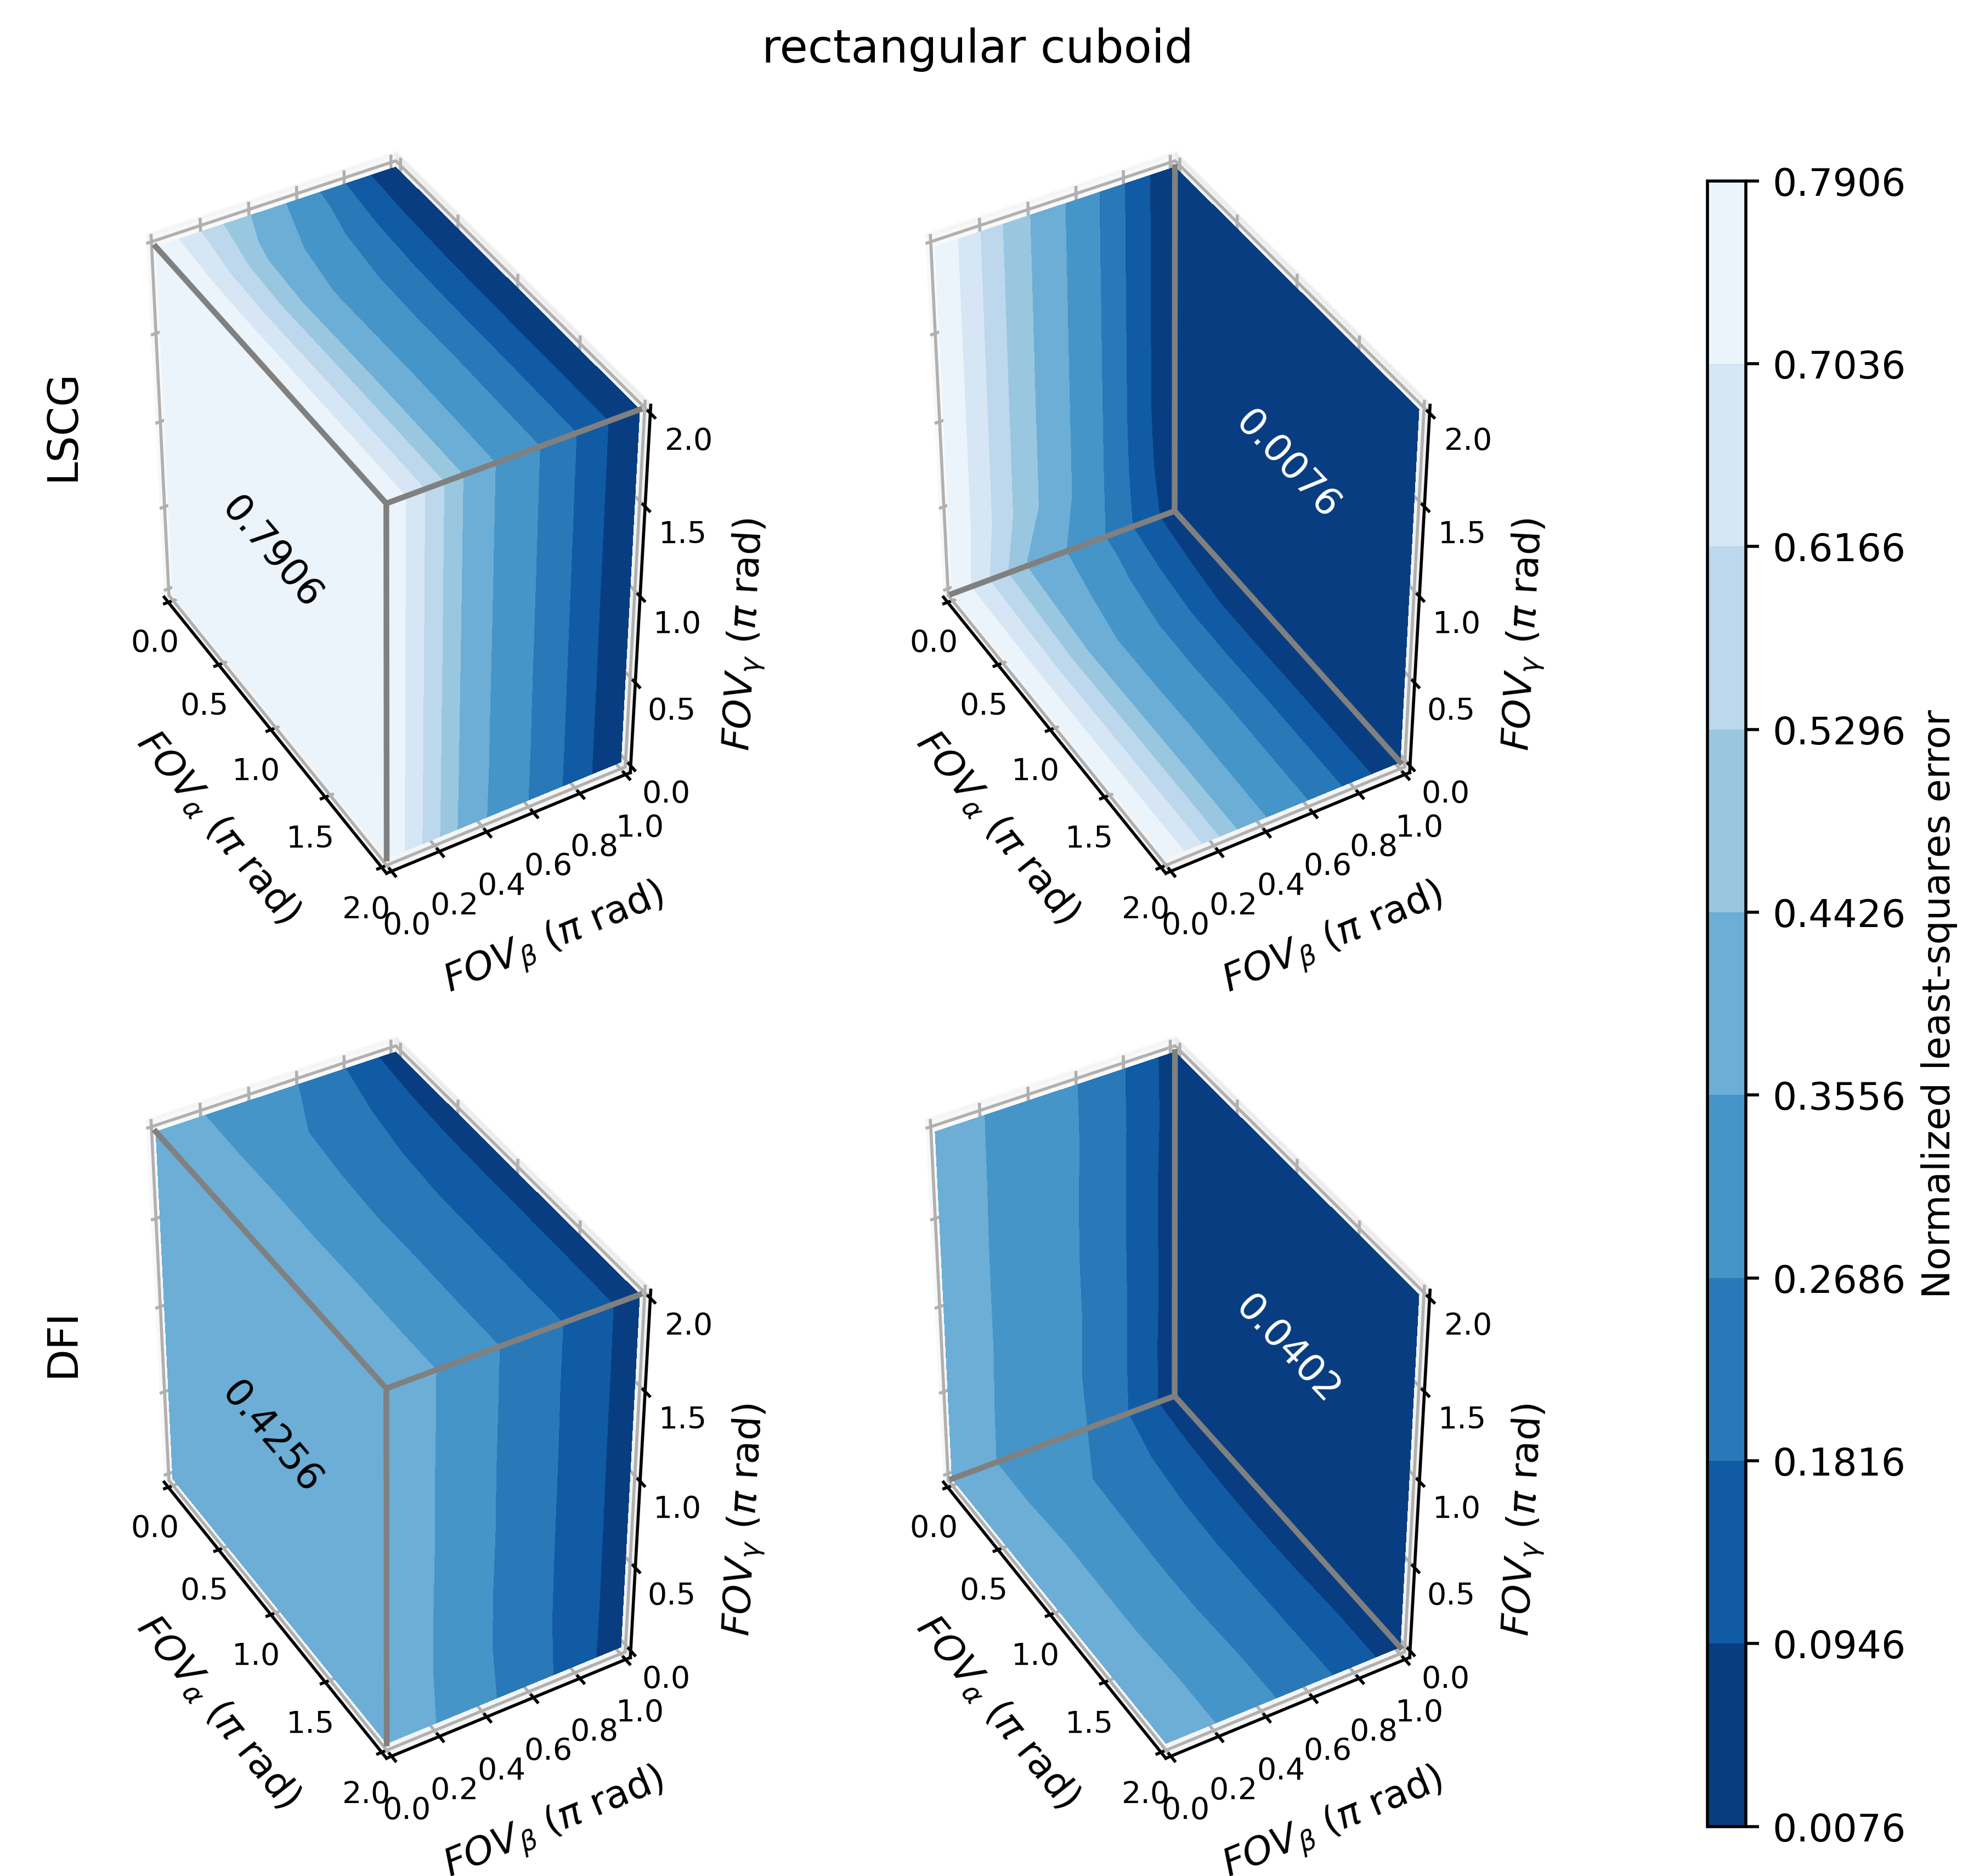

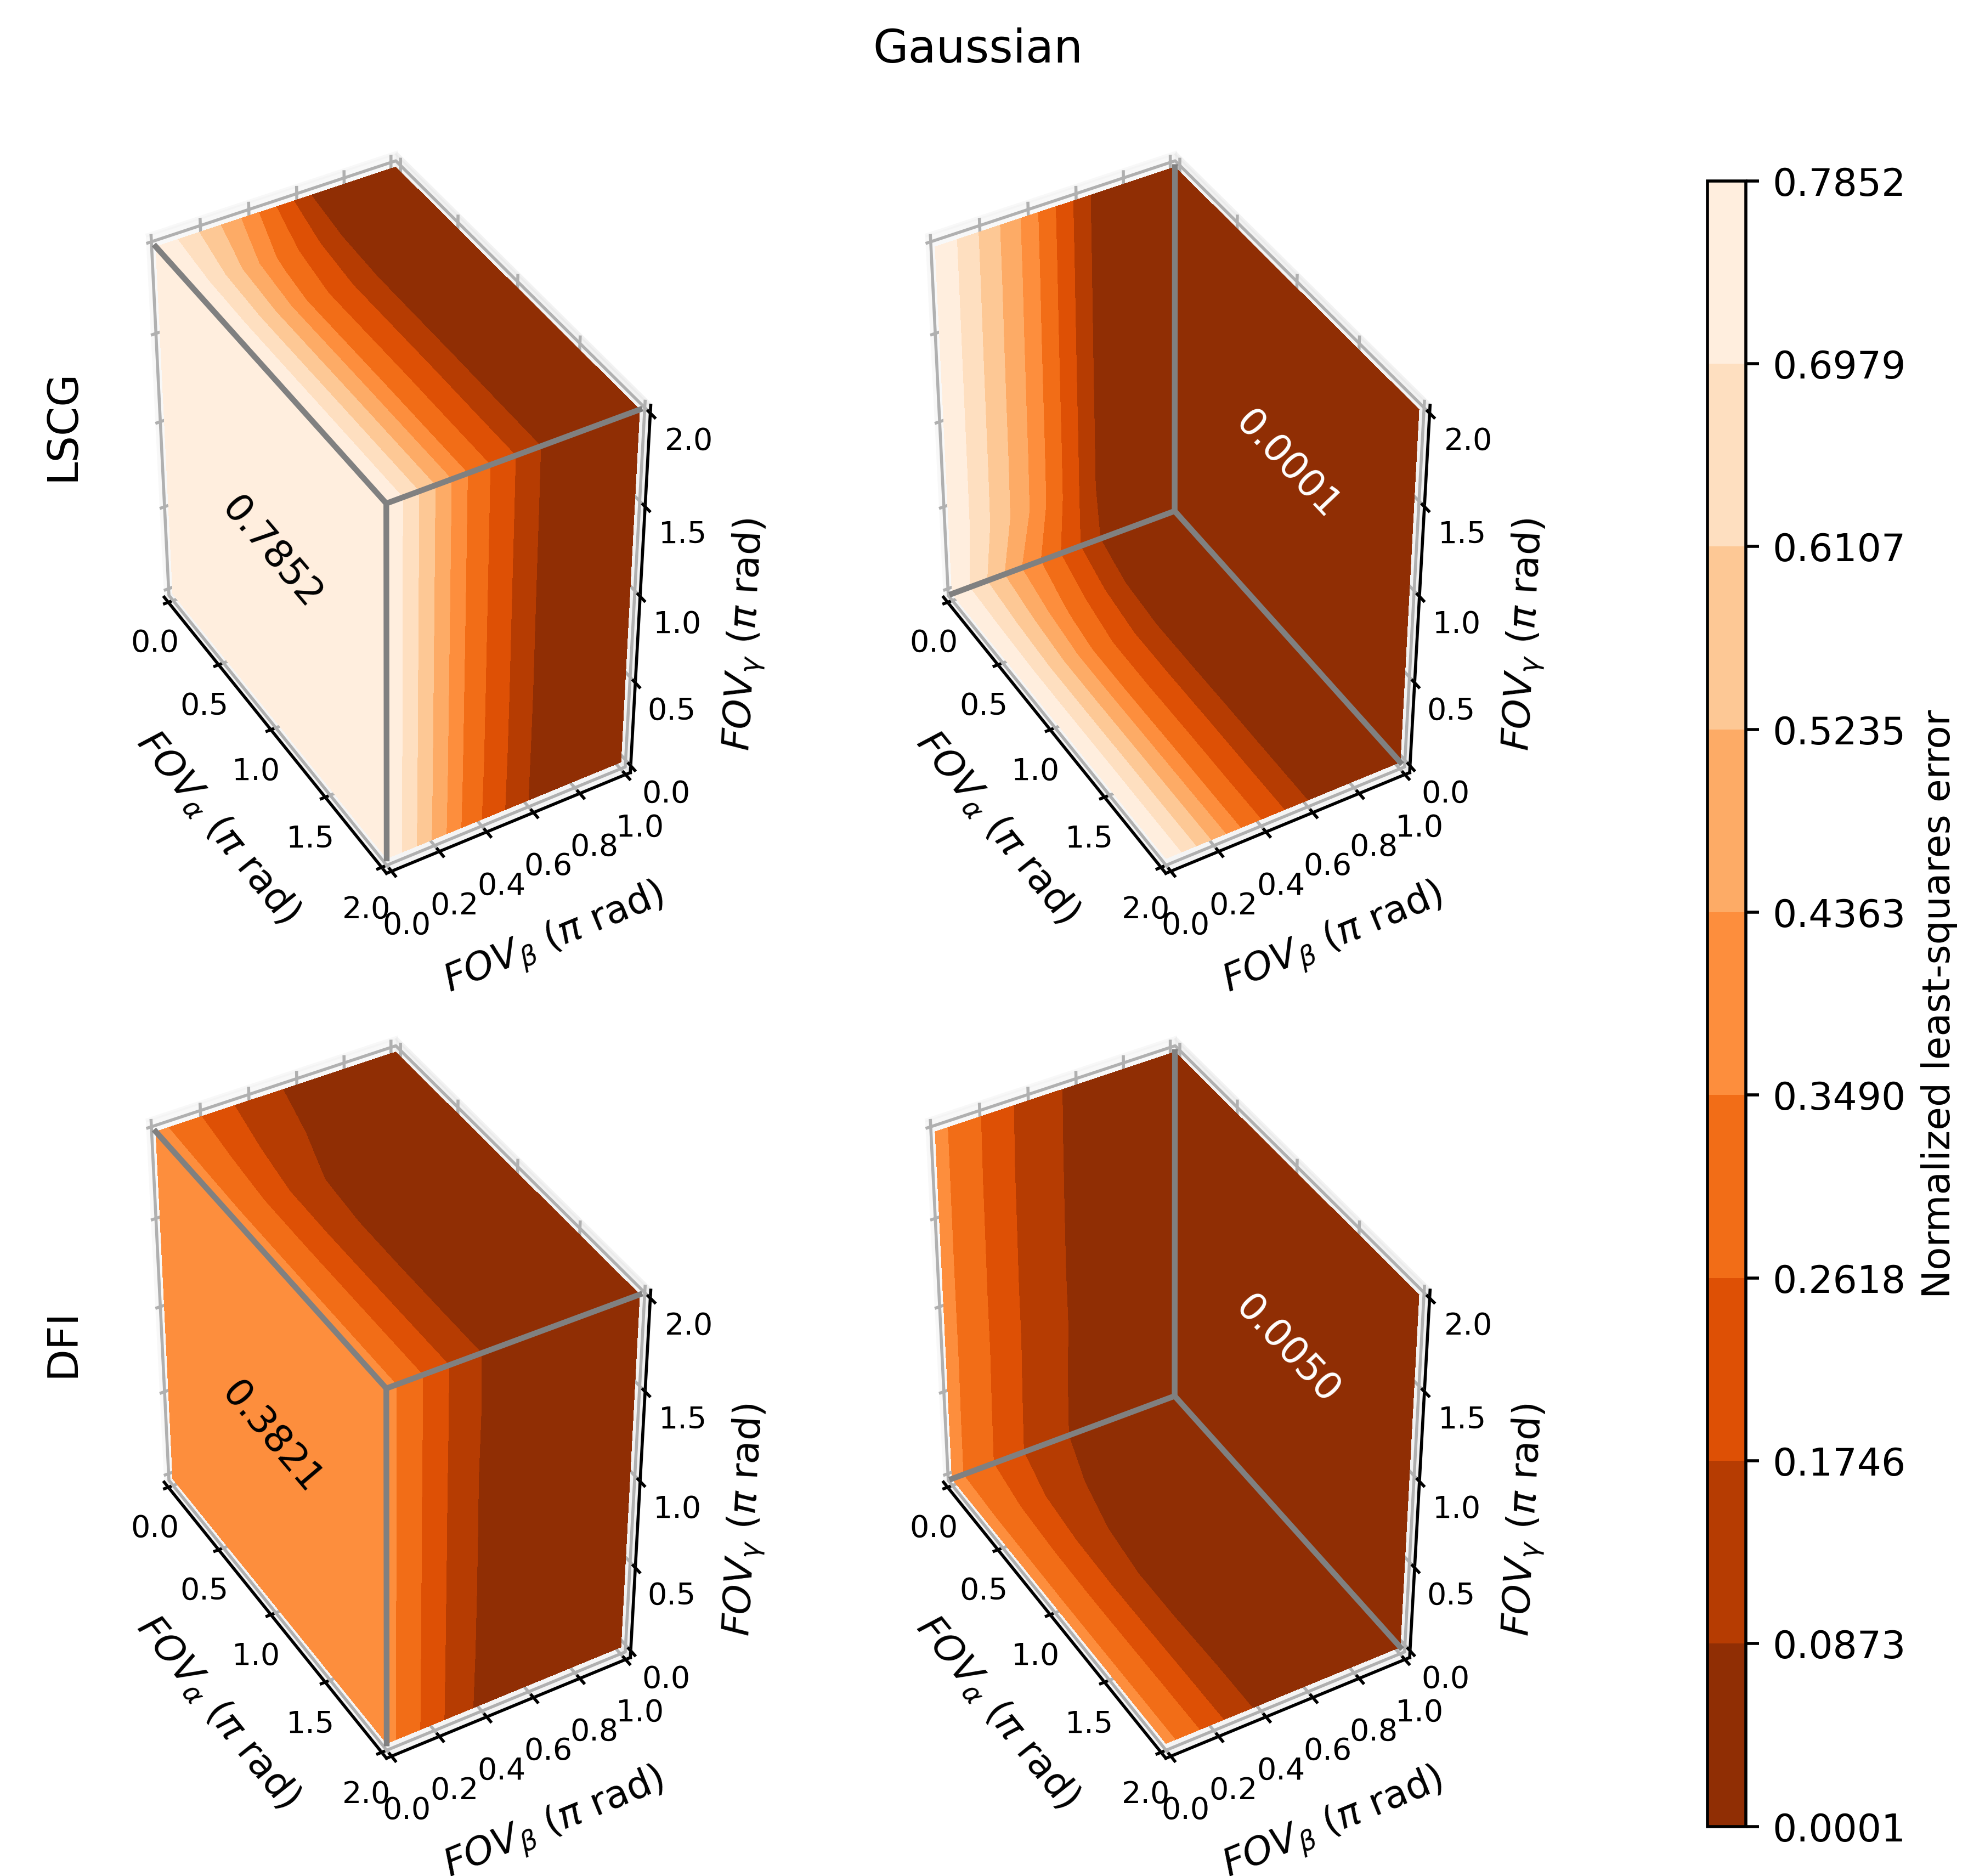

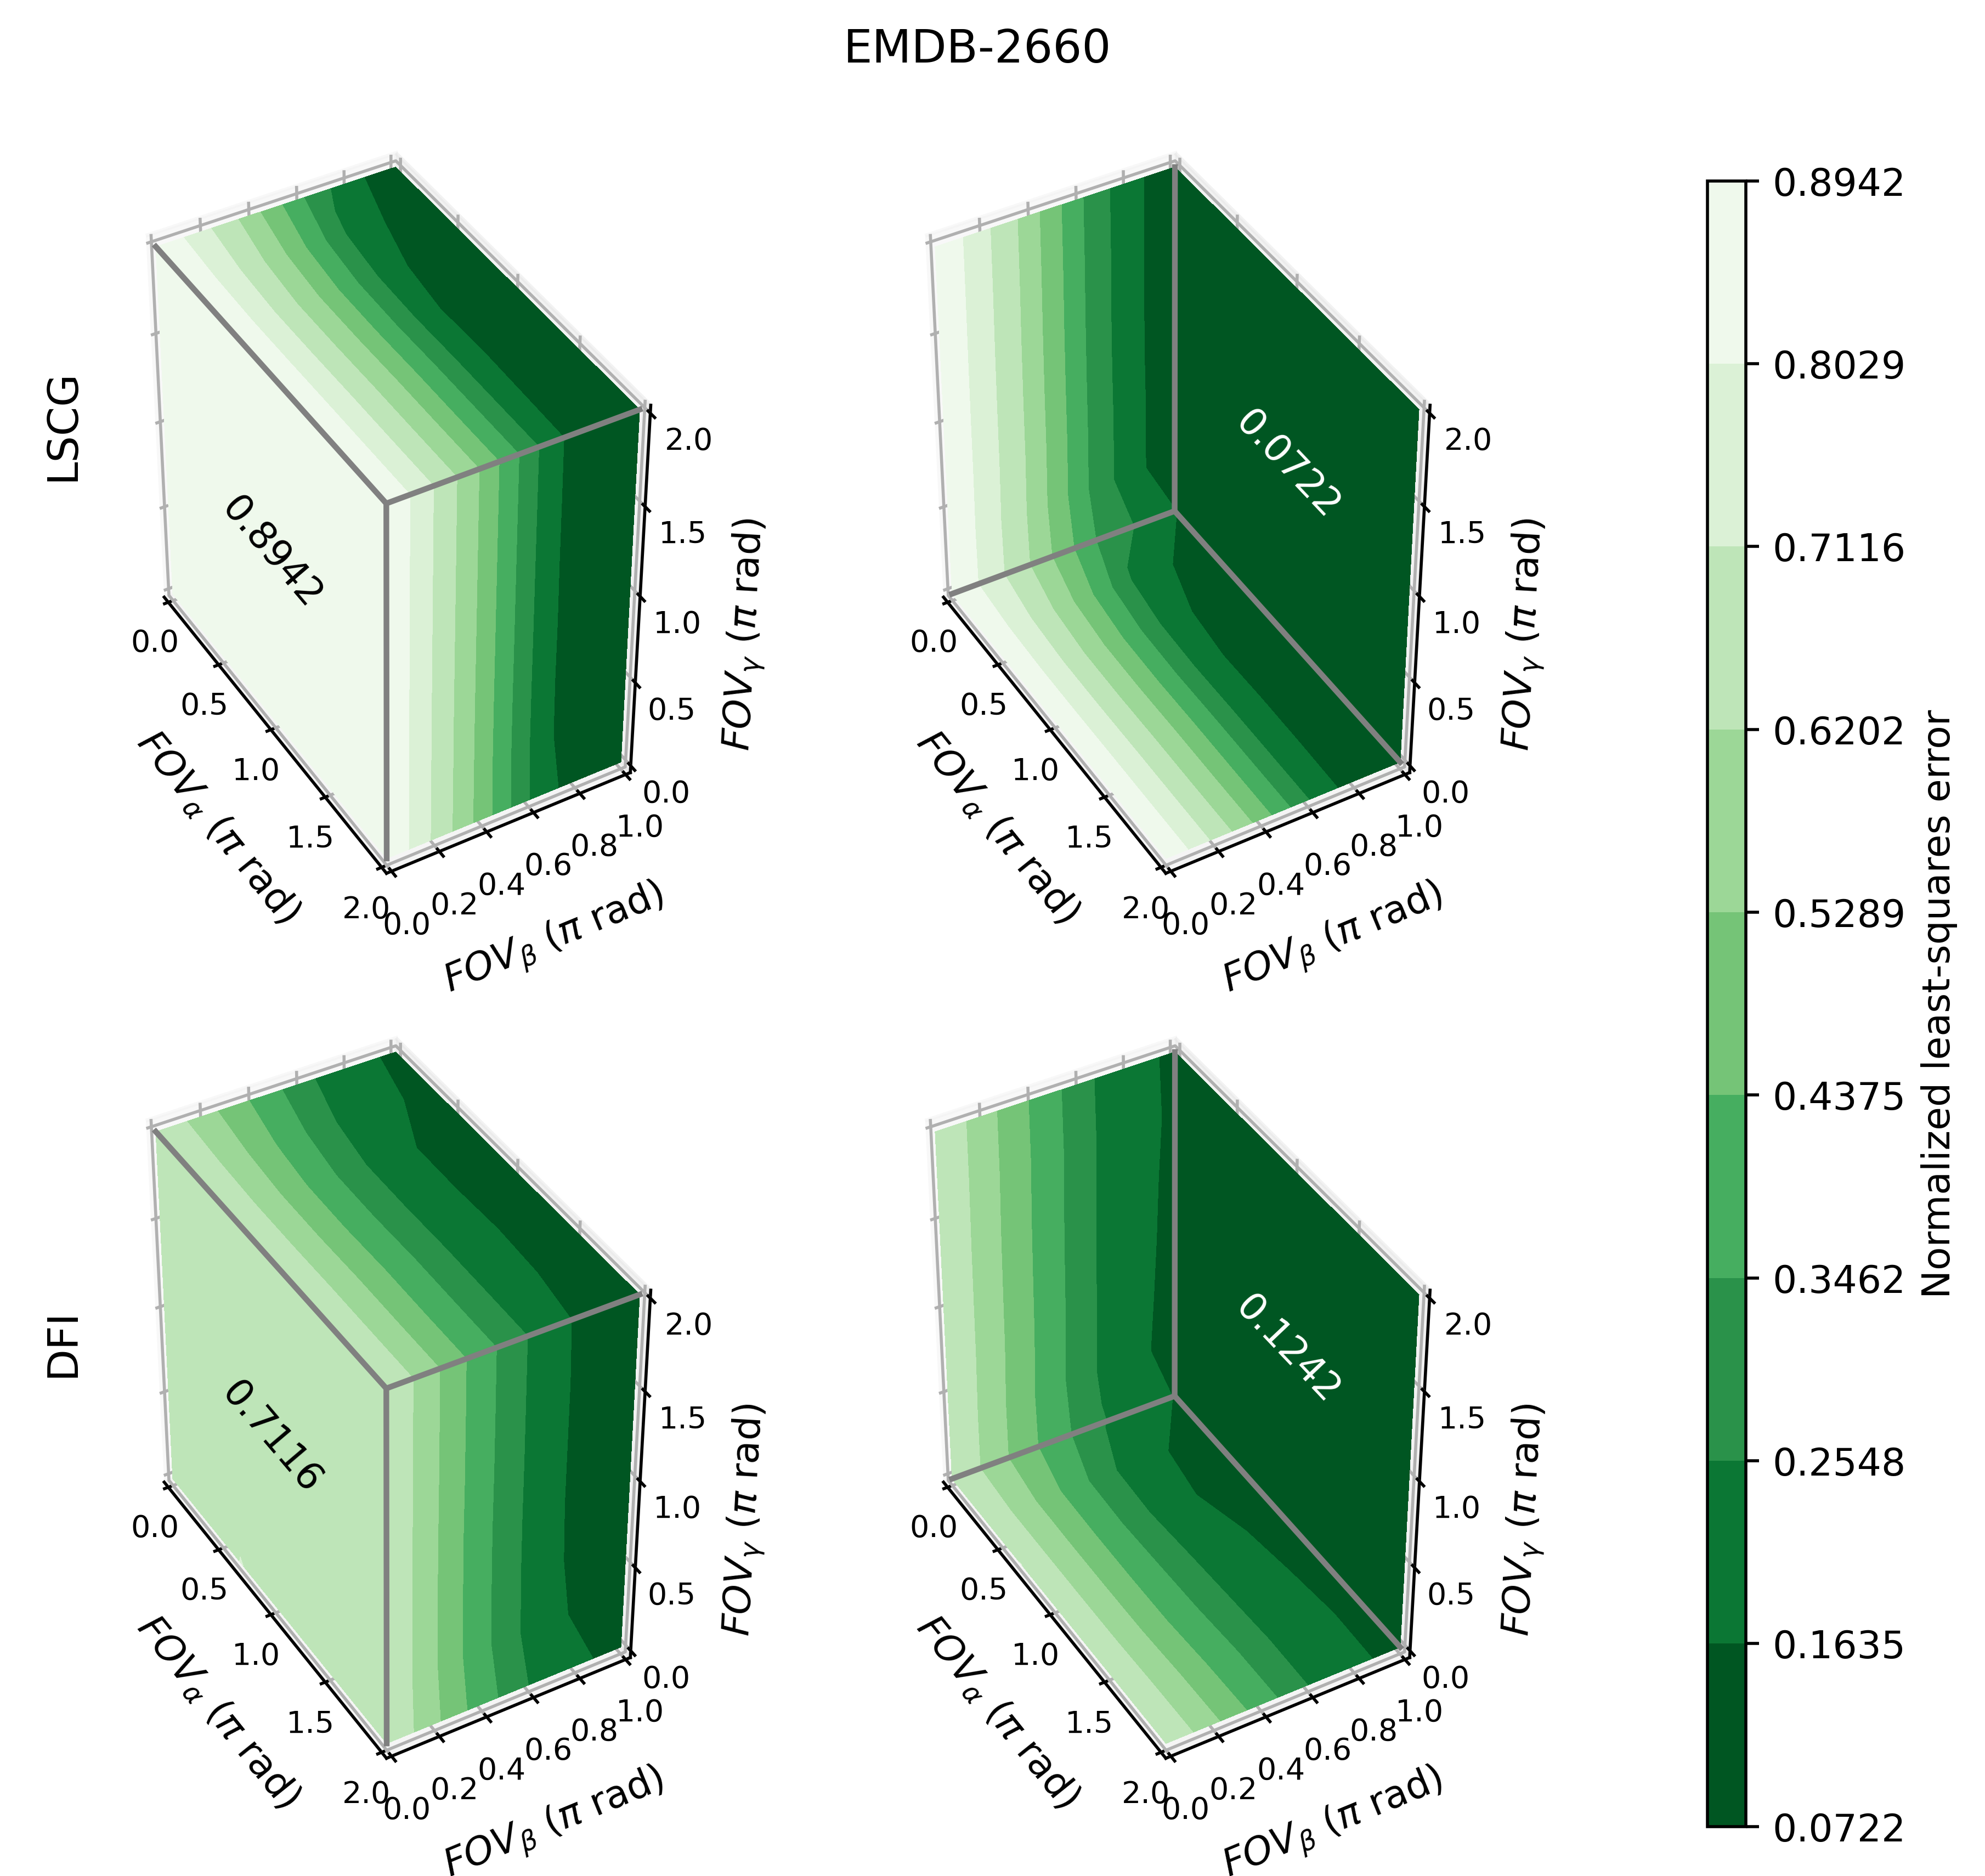

In [71]:
err_p = np.load("3Drecon_FOV_LSE_LSCG-and-DFI_res16_phis-linspace0toHalfPIin7.npy")
for n in range(len(shapes)):
    fig, ax = Inspect.plot_3d_FOV_compare(err_p[0,n,0],err_p[1,n,0],[2*PHISx/np.pi, 2*PHISy/np.pi, 2*PHISz/np.pi],title=["rectangular cuboid","Gaussian","EMDB-2660"][n],dpi=500,cmap=['Blues_r','Oranges_r','Greens_r'][n])
    fig.savefig(rf'C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\nLSE-vs-FOV_{["rect","gauss","EMDB2660"][n]}.pdf',dpi=500,bbox_inches='tight')

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from Reconstruction import *

res = 16      # volume resolution
ndim = 3       # dimensionality
Nstep = 9
seeds = [0,2,4,5]
shapes = ["rect","gauss","molecule"]
nrot = 1000
betas = np.linspace(0,np.pi/2,Nstep)

In [92]:
err = np.empty((2,len(shapes),len(seeds),Nstep))*np.nan

for n, name in enumerate(shapes):
    for s, seed in enumerate(seeds):
        if name in ["molecule"] and s>0: break
        else: data = eval(f"TestData.{name}(res,ndim=ndim,seed=seed)*2")

        for i, beta in enumerate(betas):
            np.random.seed(seed)
            angs = np.array([np.pi,beta,np.pi])
            orientations = np.random.uniform(-angs,angs,size=(nrot,3))
            R = Reconstructor(Projector(data, orientations).project(), orientations)
            
            recons1, _ = R.reconstruct(method='LSCG', maxiter=100)
            err[0,n,s,i] = Inspect.nLSE(data, recons1)
            
            recons, _ = R.reconstruct(method='DFI', maxiter=100)
            err[1,n,s,i] = Inspect.nLSE(data, recons)

            print(n,s,i,end='\r')

        #np.save(f"3Drecon_FOV_LSE_LSCG-and-DFI_res{res}_betas-linspace0toPIin{Nstep}.npy",err)

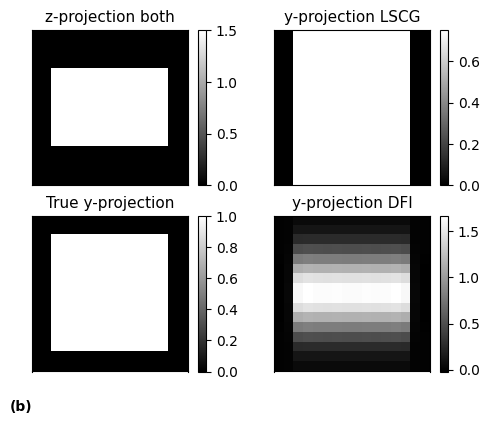

In [93]:
#r_ = r
#r1_ = r1
#r__ = r
#r1__ = r1
r = recons#INFO1[0,0,0]['intermediate'][3]
r1 = recons1

fig,ax = plt.subplots(2,2,figsize=(5,4))
#plt.suptitle(r"$0$")
i=ax[0,0].imshow(r1.mean(axis=0),cmap='gray'); plt.colorbar(i,ax=ax[0,0]); ax[0,0].set_xticks([]); ax[0,0].set_yticks([])
i=ax[0,1].imshow(r1.mean(axis=1),cmap='gray'); plt.colorbar(i,ax=ax[0,1]); ax[0,1].set_xticks([]); ax[0,1].set_yticks([])
i=ax[1,0].imshow(data.mean(axis=1),cmap='gray'); plt.colorbar(i,ax=ax[1,0]); ax[1,0].set_xticks([]); ax[1,0].set_yticks([])
i=ax[1,1].imshow(r.mean(axis=1),cmap='gray'); plt.colorbar(i,ax=ax[1,1]); ax[1,1].set_xticks([]); ax[1,1].set_yticks([])
ax[0,0].set_title("z-projection both",fontsize=11); ax[0,1].set_title("y-projection LSCG",fontsize=11)
ax[1,0].set_title("True y-projection",fontsize=11); ax[1,1].set_title("y-projection DFI",fontsize=11)
plt.tight_layout()
plt.gcf().text(0.02,-0.04,'(b)',fontweight='bold')
plt.subplots_adjust(hspace=0.2)
#plt.savefig(r'C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\MAX_FOV-error.pdf',dpi=500,bbox_inches='tight')
plt.show()

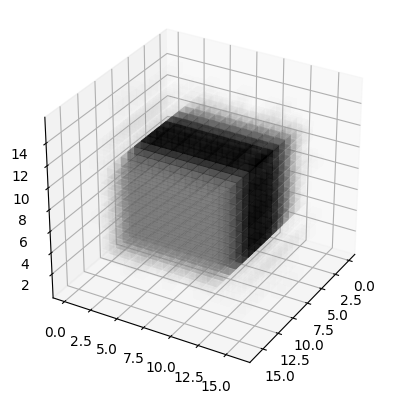

In [78]:
V = r___.clip(0,1)
voxels = np.ones([res]*3)
colors = np.zeros(voxels.shape + (4,))
colors[..., 0] = 1-V
colors[..., 1] = 1-V
colors[..., 2] = 1-V
colors[..., 3] = V

voxels2 = np.zeros(np.array(voxels.shape)*2 - 1, dtype=voxels.dtype)
voxels2[::2, ::2, ::2] = voxels
colors2 = np.zeros(np.append(np.array(colors.shape[:3])*2 - 1,4), dtype=colors.dtype)
colors2[::2, ::2, ::2, :] = colors
x, y, z = np.indices(np.array(voxels2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, voxels2, facecolors=colors2)
ax.set_aspect('equal')
ax.view_init(30,30,0)
plt.show()

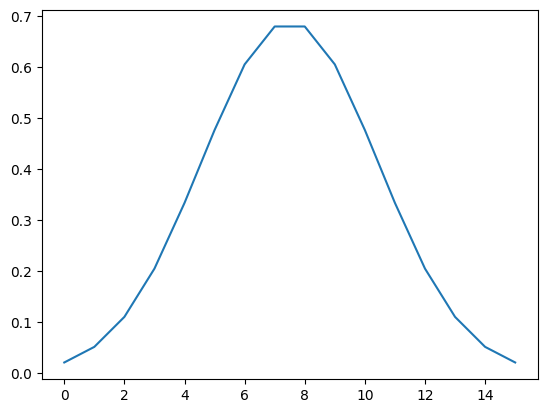

In [66]:
plt.plot(r___.mean(axis=1)[:,8])

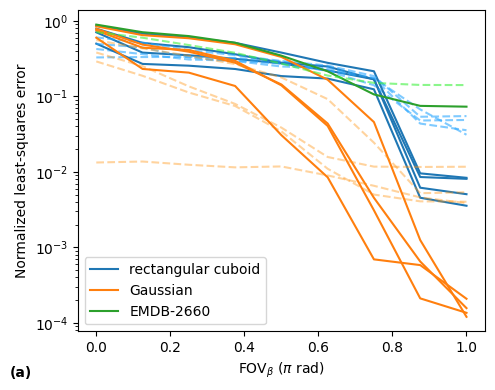

In [106]:
err_p = np.load("3Drecon_FOV_LSE_LSCG-and-DFI_res16_betas-linspace0toPIin9.npy")

plt.figure(figsize=(5,4))#,dpi=500)
for n, name in enumerate(["rectangular cuboid","Gaussian","EMDB-2660"]):
    for s, seed in enumerate(seeds):
        if not np.isnan(err_p[0,n,s]).all() and not np.isnan(err_p[0,n,s]).all():
            plt.semilogy(betas/np.pi*2,err_p[0,n,s],c=f'C{n}',ls='-',label=name if s==0 else None)
            plt.semilogy(betas/np.pi*2,err_p[1,n,s],c=['#2ba8ff','#ff930e','#3ef03e'][n],ls='--',alpha=[0.6,0.4,0.6][n])

plt.xlabel(r"FOV$_{\beta}$ ($\pi$ rad)")
plt.ylabel("Normalized least-squares error")
plt.legend()
plt.gcf().text(0.02,0.045,'(a)',fontweight='bold')
plt.tight_layout()
plt.savefig(r'C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\nLSE-vs-FOV.pdf',dpi=500)
plt.show()

#### 2D

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from Reconstruction import *

# Paramerters
seeds = [0,2,4,5]      # Radom seed
res = 128      # volume resolution
nrot = 1000    # numer of random rotations
ndim = 2       # dimensionality
shapes = ["rect","gauss","sl_phantom","camera_man"] # file name indicator
Nstep = 19
phis = np.linspace(0,np.pi/2,Nstep)

In [11]:
recons = np.empty((2,len(shapes),len(seeds),Nstep,)+data.shape)*np.nan
err = np.empty((2,len(shapes),len(seeds),Nstep))*np.nan

for n, name in enumerate(shapes):
    for s, seed in enumerate(seeds):
        if name in ['sl_phantom','camera_man'] and s>0: break
        else: data = eval(f"TestData.{name}(res,ndim=ndim,seed=seed)")
        for i,dp in enumerate(phis):
            np.random.seed(seed)
            orientations = np.random.uniform(-dp,dp,size=(nrot,))
            R = Reconstructor(Projector(data, orientations).project(), orientations)
            
            recon_LSCG, _ = R.reconstruct(method='LSCG', maxiter=1000)
            recons[0,n,s,i,:] = recon_LSCG
            err[0,n,s,i] = Inspect.nLSE(data,recon_LSCG)
            
            recon_DFI, _ = R.reconstruct(method='DFI', maxiter=1000)
            recons[1,n,s,i,:] = recon_DFI
            err[1,n,s,i] = Inspect.nLSE(data,recon_DFI)

            print(n,s,i,end='\r')
            
    np.save(f"2Drecon_FOV_recons_LSCG-and-DFI_res{res}_phis-linspace0toHalfPIin{Nstep}.npy",recons)
    np.save(f"2Drecon_FOV_LSE_LSCG-and-DFI_res{res}_phis-linspace0toHalfPIin{Nstep}.npy",err)

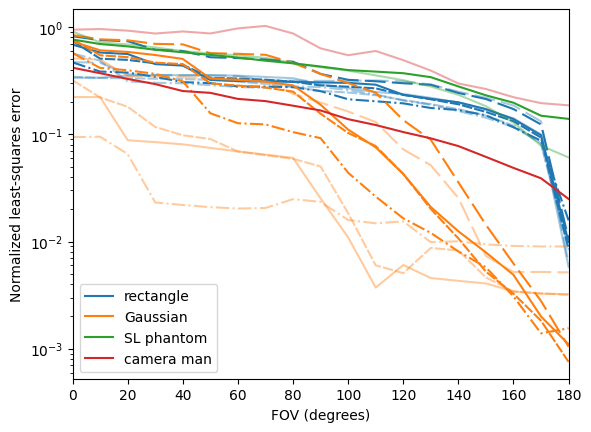

In [14]:
err_p = np.load("2Drecon_FOV_LSE_LSCG-and-DFI_res128_phis-linspace0toHalfPIin19.npy")

for n, label in enumerate(['rectangle','Gaussian','SL phantom','camera man']):
    for s, ls in enumerate(['-',(0,(5,1)),'-.',(0,(10,3))]):
        if not np.isnan(err_p[0,n,s,:]).all() and not np.isnan(err_p[1,n,s,:]).all():
            plt.semilogy(phis*2*180/np.pi,err_p[0,n,s,:],c=f'C{n}',ls=ls,label=label if s==0 else None) # LSCG 
            plt.semilogy(phis*2*180/np.pi,err_p[1,n,s,:],c=f'C{n}',ls=ls,alpha=0.4)   # DFI

plt.xlabel("FOV (degrees)")
plt.ylabel("Normalized least-squares error")
plt.xlim(0,180)
plt.legend()
plt.show()

---

### Non-uniformly distributed projection orientations

#### 2D

In [15]:
# Paramerters
seed = 0      # Radom seed
res = 128      # volume resolution
nrot = 1000    # numer of random rotations
ndim = 2       # dimensionality
name = "rect" # file name indicator

# Generate random orientation angles and test data
data = TestData.rect(res,ndim=ndim,seed=seed)

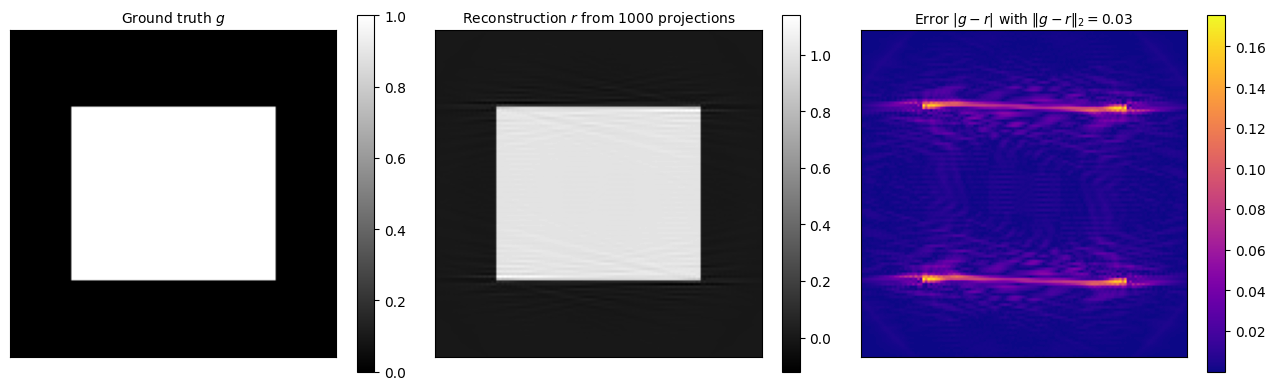

In [16]:
np.random.seed(seed)
orientations = np.random.normal(0,0.55,size=int(nrot*10))
orientations = np.delete(orientations,(orientations>np.pi)*(orientations<-np.pi))[:nrot]
projections = Projector(data, orientations).project()
R = Reconstructor(projections, orientations)
recon, _ = R.reconstruct(method='DFI', maxiter=1000)

fig, ax = plt.subplots(1,3,figsize=(13,4))
Id = ax[0].imshow(data, cmap="gray"); plt.colorbar(Id,ax=ax[0]); ax[0].set_title("Ground truth $g$",fontsize=10)
Ir = ax[1].imshow(recon, cmap="gray"); plt.colorbar(Ir,ax=ax[1]); ax[1].set_title(f"Reconstruction $r$ from {orientations.size} projections",fontsize=10)
Ie = ax[2].imshow(np.abs(data-recon),cmap='plasma'); plt.colorbar(Ie,ax=ax[2]); ax[2].set_title(fr"Error $|g-r|$ with $\|g-r\|_2=${np.linalg.norm(data-recon)/np.linalg.norm(data):1.2f}",fontsize=10)
for axis in ax: axis.set_xticks([]); axis.set_yticks([])
plt.tight_layout()
plt.show()

---

### Euler angles

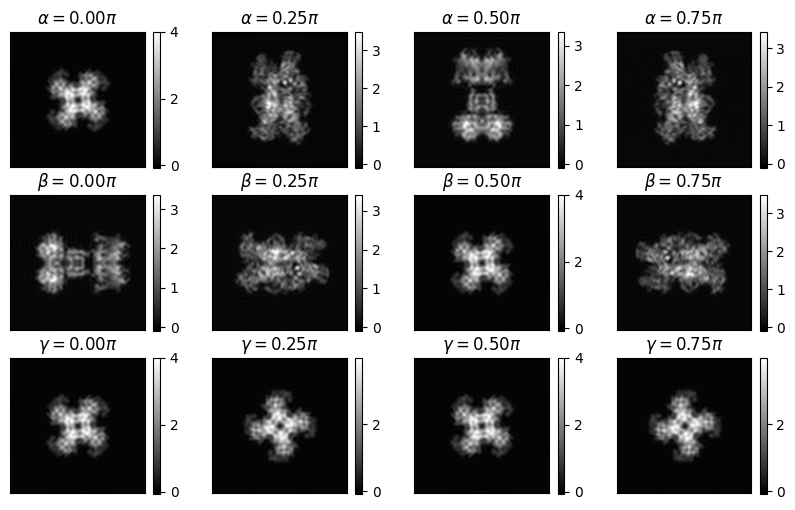

In [20]:
rots = np.array([[0.,np.pi/2,0.],[np.pi/4,np.pi/2,0.],[np.pi/2,np.pi/2,0.],[np.pi/4*3,np.pi/2,0.],
                 [0.,0.,0.],[0.,np.pi/4,0.],[0.,np.pi/2,0.],[0.,np.pi/4*3,0.],
                 [0.,np.pi/2,0.],[0.,np.pi/2,np.pi/4],[0.,np.pi/2,np.pi/2],[0.,np.pi/2,np.pi/4*3]])
n = len(rots)//3
data = TestData.channelspin(128)
projec = Projector(data,rots).project()

fig, ax = plt.subplots(3,n,figsize=(10,6))
for i in range(n):
    Id = ax[0,i].imshow(projec[i], cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
    ax[0,i].set_title(rf"$\alpha=${rots[i,0]/np.pi:1.2f}$\pi$")
    Id = ax[1,i].imshow(projec[i+n], cmap="gray"); plt.colorbar(Id,ax=ax[1,i])
    ax[1,i].set_title(rf"$\beta=${rots[i+n,1]/np.pi:1.2f}$\pi$")
    Id = ax[2,i].imshow(projec[i+2*n], cmap="gray"); plt.colorbar(Id,ax=ax[2,i])
    ax[2,i].set_title(rf"$\gamma=${rots[i+2*n,2]/np.pi:1.2f}$\pi$")
    for j in range(3):
        ax[j,i].set_xticks([]); ax[j,i].set_yticks([])

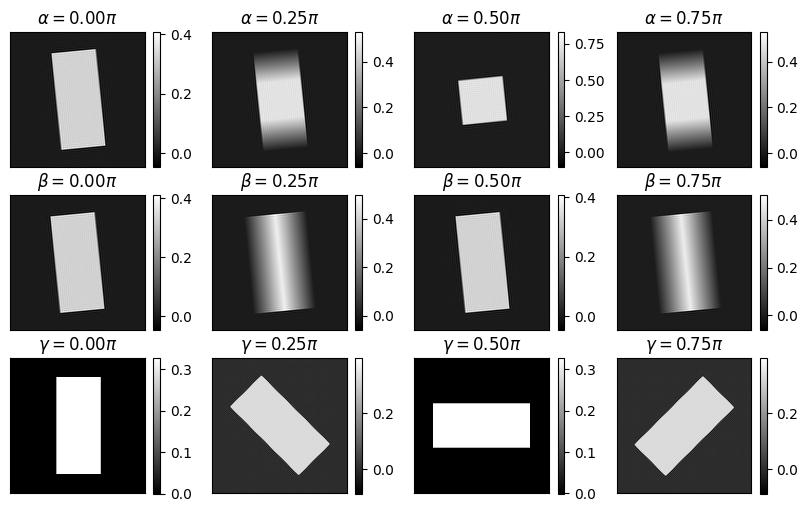

In [18]:
rots = np.array([[0.,np.pi/2,0.1],[np.pi/4,np.pi/2,0.1],[np.pi/2,np.pi/2,0.1],[np.pi/4*3,np.pi/2,0.1],
                 [0.,0.,0.1],[0.,np.pi/4,0.1],[0.,np.pi/2,0.1],[0.,np.pi/4*3,0.1],
                 [0.,np.pi/2,0.],[0.,np.pi/2,np.pi/4],[0.,np.pi/2,np.pi/2],[0.,np.pi/2,np.pi/4*3]])
n = len(rots)//3
data = TestData.rect(ndim=3,res=128,seed=5)#w=[0.1,0.3,0.4])
projec = Projector(data,rots).project()

fig, ax = plt.subplots(3,n,figsize=(10,6))
for i in range(n):
    Id = ax[0,i].imshow(projec[i], cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
    ax[0,i].set_title(rf"$\alpha=${rots[i,0]/np.pi:1.2f}$\pi$")
    Id = ax[1,i].imshow(projec[i+n], cmap="gray"); plt.colorbar(Id,ax=ax[1,i])
    ax[1,i].set_title(rf"$\beta=${rots[i+n,1]/np.pi:1.2f}$\pi$")
    Id = ax[2,i].imshow(projec[i+2*n], cmap="gray"); plt.colorbar(Id,ax=ax[2,i])
    ax[2,i].set_title(rf"$\gamma=${rots[i+2*n,2]/np.pi:1.2f}$\pi$")
    for j in range(3):
        ax[j,i].set_xticks([]); ax[j,i].set_yticks([])

---

### FPS Theorem

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from Reconstruction import *

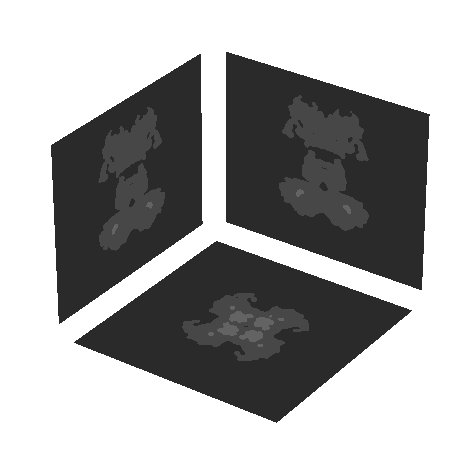

In [113]:
ax = plt.subplot(111,projection='3d')

datmin = data.min(); datmax = data.max()
kw = {'vmin': datmin,'vmax': datmax,'levels': np.linspace(datmin, datmax, 10),'cmap': 'gray'}

X,Y,Z = np.mgrid[0:128:res*1j,0:128:res*1j,0:128:res*1j]
off = 10
ax.contourf(projecX,Y[0,:,:],Z[0,:,:],zdir='x',offset=-off,**kw)
ax.contourf(X[:,-1,:],projecY,Z[:,-1,:],zdir='y',offset=res+off,**kw)
ax.contourf(X[:,:,0],Y[:,:,0],projecZ,zdir='z',offset=-off,**kw)

ax.view_init(30,-55, 0)
ax.axis('off')
plt.tight_layout()
plt.savefig(r'C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\proj3D',dpi=500)
plt.show()

In [20]:
import mrcfile
import numpy as np
# Read the .map file
with mrcfile.open(r'C:\Users\Leon\Downloads\emd_39868.map', permissive=True) as mrc:
    data = mrc.data.astype(float)

# The 'data' variable now holds your 3D numpy array
projx = data.mean(axis=0); projy = data.mean(axis=1); projz = data.mean(axis=2);
#plt.imshow(projy); plt.show()
#plt.imshow(Projector(data.astype(float),np.array([[0,0.,0],[np.pi/2,np.pi/2,np.pi/2],[0,np.pi/2,np.pi/2]])).project()[1])
R = Reconstructor(np.array([projx,projy,projz]),np.array([[0,0.,0],[np.pi/2,np.pi/2,np.pi/2],[0,np.pi/2,np.pi/2]]))

C:\Users\Leon\AppData\Local\Temp\ipykernel_18884\1222330352.py:6: RuntimeWarning: divide by zero encountered in log
  ax.scatter(*k.real,c=np.log(F.real),cmap='gray')
C:\Users\Leon\AppData\Local\Temp\ipykernel_18884\1222330352.py:6: RuntimeWarning: invalid value encountered in log
  ax.scatter(*k.real,c=np.log(F.real),cmap='gray')


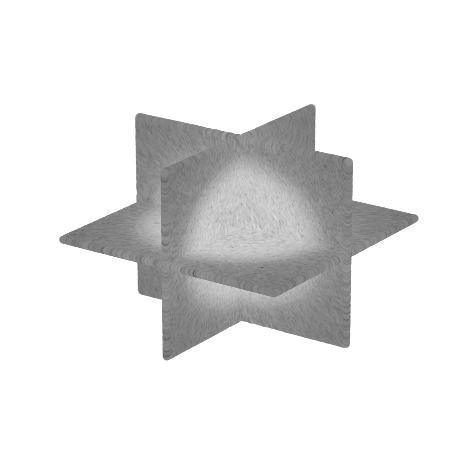

In [35]:
F = R.fslices
k = R.fslice_pts

ax = plt.subplot(111,projection='3d')

ax.scatter(*k.real,c=np.log(F.real),cmap='gray')

ax.view_init(20,-55, 0)
ax.axis('off')
plt.tight_layout()
plt.savefig(r'C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\slice3D',dpi=500)
plt.show()

---

# 3D reconstruction

In [36]:
#del Inspect
import importlib
import Reconstruction
importlib.reload(Reconstruction)
Inspect = Reconstruction.Inspect; Reconstructor = Reconstruction.Reconstructor

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from Reconstruction import *

res = 32       # volume resolution
ndim = 3       # dimensionality
seed = 0
maxiter = 1000

np.random.seed(seed)
orientations = np.random.uniform([-np.pi,-np.pi/2,-np.pi],[np.pi,np.pi/2,np.pi],size=(1000,3))
name = 'EMDB-2660'
data = TestData.molecule(res)

2024-06-02 09:02:32,316 INFO [aspire.volume.volume] C:\Users\Leon\AppData\Local\ASPIRE-data\ASPIRE-data\Cache\emdb_2660.map with dtype float32 loaded as None


In [38]:
R = Reconstructor(Projector(data,orientations).project(), orientations)
recon_lscg, info_lscg = R.reconstruct(method='lscg', maxiter=maxiter)
print(f"LSCG {'converged in' if info_lscg['niter']<maxiter else 'was stopped after'} {info_lscg['niter']:1.0f} iterations in {info_lscg['time']:1.3f}s")
recon_dfi, info_dfi = R.reconstruct(method='dfi', maxiter=maxiter)
print(f"DFI {'converged in' if info_dfi['niter']<maxiter else 'was stopped after'} {info_dfi['niter']:1.0f} iterations in {info_dfi['time']:1.3f}s")

LSCG converged in 220 iterations in 6.724s
DFI was stopped after 1000 iterations in 1300.106s


LSCG: 6.71895e-02


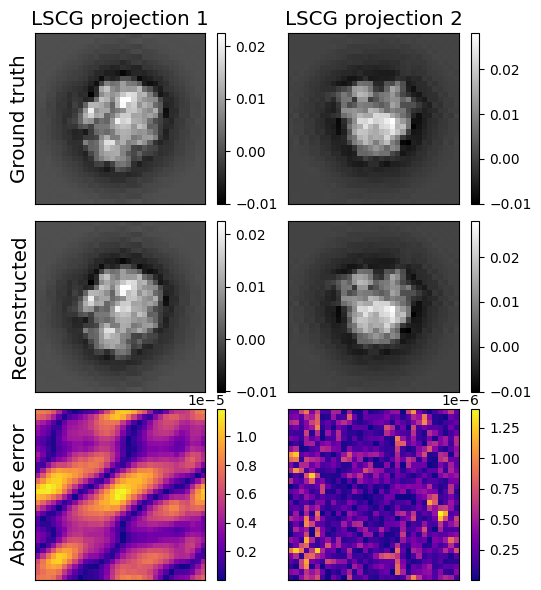

DFI: 1.53323e-01


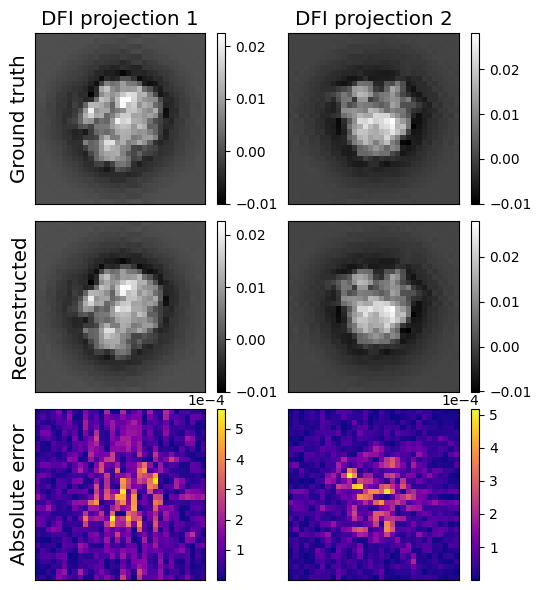

In [42]:
np.random.seed(100)
projection_angles = np.random.uniform([-np.pi,-np.pi/2,-np.pi],[np.pi,np.pi/2,np.pi],size=(1000,3))
data_projections = Projector(data,projection_angles).project()
reconstruction1_projections = Projector(recon_lscg,projection_angles).project()
reconstruction2_projections = Projector(recon_dfi,projection_angles).project()

kw = {"fontsize":14.35,"ha":'left',"x":0.04,"y":0,"color":'white',"backgroundcolor":(0,0,0,0.3),"fontweight":'bold'}
fs = 14.35

fig, ax = plt.subplots(3,2,figsize=(5.5,6))
for i in range(2):
    Id = ax[0,i].imshow(data_projections[i], cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
    Ir = ax[1,i].imshow(reconstruction1_projections[i], cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
    Ie = ax[2,i].imshow(np.abs(data_projections[i]-reconstruction1_projections[i]),cmap='plasma'); cbar = plt.colorbar(Ie,ax=ax[2,i]); cbar.formatter.set_powerlimits((0, 0))
    ax[0,i].set_title(fr"LSCG projection {i+1}",fontsize=fs)
    for j in range(3):
        ax[j,i].set_xticks([]); ax[j,i].set_yticks([])

print(f'LSCG: {Inspect.nLSE(data,recon_lscg):1.5e}')

ax[0,0].set_ylabel("Ground truth",fontsize=fs)
ax[1,0].set_ylabel("Reconstructed",fontsize=fs)
ax[2,0].set_ylabel("Absolute error",fontsize=fs)
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)
#plt.savefig(rf"C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\3Drecon_LSCG_EMDB2660.jpg",dpi=500)
plt.show()

fig, ax = plt.subplots(3,2,figsize=(5.5,6))
for i in range(2):
    Id = ax[0,i].imshow(data_projections[i], cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
    Ir = ax[1,i].imshow(reconstruction2_projections[i], cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
    Ie = ax[2,i].imshow(np.abs(data_projections[i]-reconstruction2_projections[i]),cmap='plasma'); cbar = plt.colorbar(Ie,ax=ax[2,i]); cbar.formatter.set_powerlimits((0, 0))
    ax[0,i].set_title(fr"DFI projection {i+1}",fontsize=fs)
    for j in range(3):
        ax[j,i].set_xticks([]); ax[j,i].set_yticks([])

print(f'DFI: {Inspect.nLSE(data,recon_dfi):1.5e}')

ax[0,0].set_ylabel("Ground truth",fontsize=fs)
ax[1,0].set_ylabel("Reconstructed",fontsize=fs)
ax[2,0].set_ylabel("Absolute error",fontsize=fs)
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)
#plt.savefig(rf"C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\3Drecon_DFI_EMDB2660.jpg",dpi=500)
plt.show()

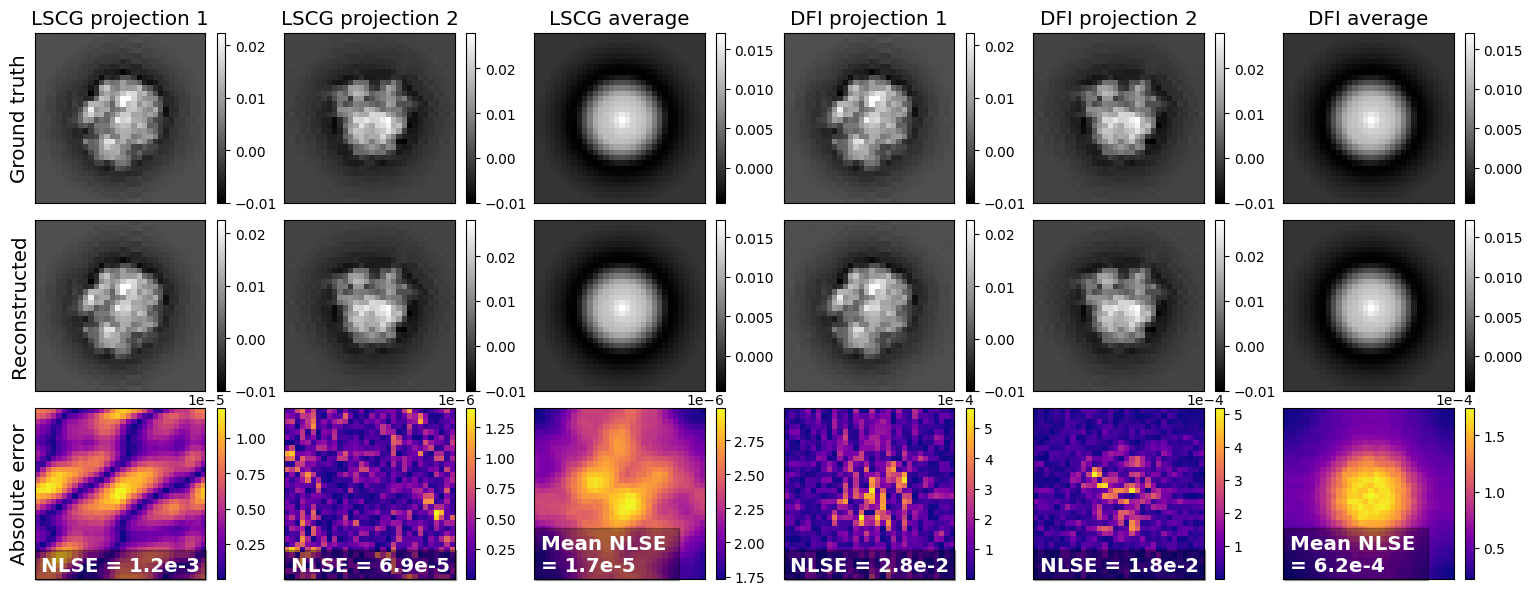

In [57]:
np.random.seed(100)
projection_angles = np.random.uniform([-np.pi,-np.pi/2,-np.pi],[np.pi,np.pi/2,np.pi],size=(1000,3))
data_projections = Projector(data,projection_angles).project()
reconstruction1_projections = Projector(recon_lscg,projection_angles).project()
reconstruction2_projections = Projector(recon_dfi,projection_angles).project()

kw = {"fontsize":14.35,"ha":'left',"x":0.04,"y":0,"color":'white',"backgroundcolor":(0,0,0,0.3),"fontweight":'bold'}
fs = 14.35

fig, ax = plt.subplots(3,6,figsize=(15.5,6))
#plt.suptitle(title)
for i in range(3):
    if i<2:
        Id = ax[0,i].imshow(data_projections[i], cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(reconstruction1_projections[i], cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(data_projections[i]-reconstruction1_projections[i]),cmap='plasma'); cbar = plt.colorbar(Ie,ax=ax[2,i]); cbar.formatter.set_powerlimits((0, 0))
        ax[0,i].set_title(fr"LSCG projection {i+1}",fontsize=fs)
        ax[2,i].set_title(fr"NLSE = {Inspect.nLSE(data_projections[i],reconstruction1_projections[i]):1.1e}".replace("e-0", "e-"),**kw)
    else:
        Id = ax[0,i].imshow(data_projections.mean(axis=0), cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(reconstruction1_projections.mean(axis=0), cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(data_projections-reconstruction1_projections).mean(axis=0),cmap='plasma'); cbar = plt.colorbar(Ie,ax=ax[2,i]); cbar.formatter.set_powerlimits((0, 0))
        ax[0,i].set_title(fr"LSCG average",fontsize=fs)
        ax[2,i].set_title(f"Mean NLSE \n= {Inspect.nLSE(data_projections,reconstruction1_projections,axis=(-2,-1)).mean():1.1e}".replace("e-0", "e-"),**kw)
    for j in range(3):
        ax[j,i].set_xticks([]); ax[j,i].set_yticks([])
for i in range(3,6):
    if i<5:
        Id = ax[0,i].imshow(data_projections[i-3], cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(reconstruction2_projections[i-3], cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(data_projections[i-3]-reconstruction2_projections[i-3]),cmap='plasma'); cbar = plt.colorbar(Ie,ax=ax[2,i]); cbar.formatter.set_powerlimits((0, 0))
        ax[0,i].set_title(fr"DFI projection {i-2}",fontsize=fs)
        ax[2,i].set_title(fr"NLSE = {Inspect.nLSE(data_projections[i-3],reconstruction2_projections[i-3]):1.1e}".replace("e-0", "e-"),**kw)
    else:
        Id = ax[0,i].imshow(data_projections.mean(axis=0), cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(reconstruction2_projections.mean(axis=0), cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(data_projections-reconstruction2_projections).mean(axis=0),cmap='plasma'); cbar = plt.colorbar(Ie,ax=ax[2,i]); cbar.formatter.set_powerlimits((0, 0))
        ax[0,i].set_title(fr"DFI average",fontsize=fs)
        ax[2,i].set_title(f"Mean NLSE \n= {Inspect.nLSE(data_projections,reconstruction2_projections,axis=(-2,-1)).mean():1.1e}".replace("e-0", "e-"),**kw)
    for j in range(3):
        ax[j,i].set_xticks([]); ax[j,i].set_yticks([])
ax[0,0].set_ylabel("Ground truth",fontsize=fs)
ax[1,0].set_ylabel("Reconstructed",fontsize=fs)
ax[2,0].set_ylabel("Absolute error",fontsize=fs)
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(rf"C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\3Drecon_compare-LSCG-DFI_EMDB2660.pdf",dpi=500)
plt.show()

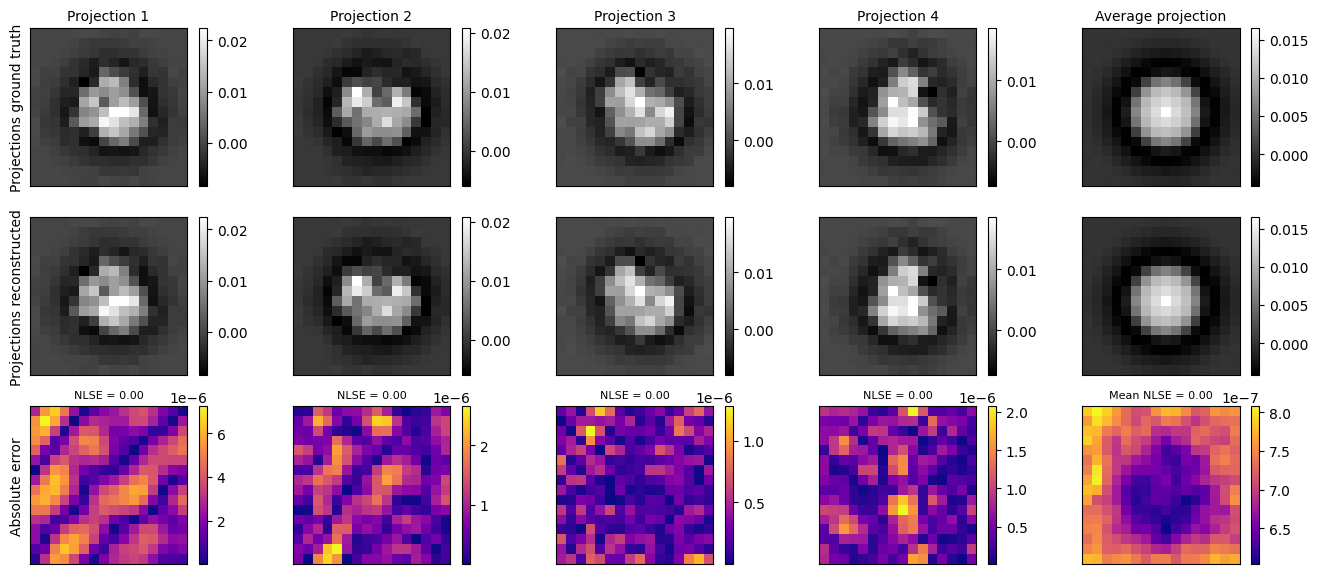

In [56]:
fig, ax = Inspect.plot_3d_recon(data,recon_lscg,seed=42)
#fig.savefig(rf'C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\3Drecon_{name}_LSCG_res{res}.pdf',dpi=500)
fig, ax = Inspect.plot_3d_recon(data,recon_dfi,seed=42)
#fig.savefig(rf'C:\Users\Leon\OneDrive\Documenten\UU\Reports and presentations\True 3D reconstruction from 2D projections - Inverse problems in imaging\Figures\3Drecon_{name}_DFI_res{res}.pdf',dpi=500)

## old

In [1]:
## Turn of console output of ASPIRE
from aspire.utils.logging import setConsoleLoggingLevel
setConsoleLoggingLevel("WARNING")

In [44]:
## Import functions and initialize data
from aspire.reconstruction import MeanEstimator
from aspire.source import Simulation
from aspire.volume import Volume as Volume
import numpy as np
import matplotlib.pyplot as plt
from Reconstruction import *
from time import time

# Paramerters
seed = 2      # Random seed
res = 16       # volume resolution
nrot = 1000    # numer of random rotations
ndim = 3       # dimensionality
name = "gauss"  # file name indicator

if ndim == 2: shape = (nrot,)
elif ndim == 3: shape = (nrot,3)

# Generate random orientation angles and test data
np.random.seed(seed)
orientations = np.random.uniform([-np.pi,-np.pi/2,-np.pi],[np.pi,np.pi/2,np.pi],size=shape)
np.random.seed(seed)
delta = np.pi/100
orer = delta*np.random.normal(0,1,orientations.shape)
data = TestData.channelspin(res,ndim=ndim,seed=seed)

In [16]:
## PyNUFFT implementation
# Simulate projected data
projections = Projector(data, orientations).project()

# Reconstruct volume from projections
reconstructor = Reconstructor(projections, orientations+orer)
t = time()
recon_pn = reconstructor.reconstruct(method='PyNUFFTcg', KSOR=1.2, IS=6, maxiter=50)
print(time()-t)
np.save(f'{len(data.shape)}Drecon_{name}_res{res}_PyNUFFT',recon)

22.01368546485901


In [45]:
## FIRM3D implementation
# Simulate projected data
projections = Projector(data, orientations).project()

# Reconstruct volume from projections
reconstructor = Reconstructor(projections, orientations+orer)
t = time()
recon_fm = reconstructor.reconstruct(method='FIRM3D', maxiter=1000)
print(time()-t)
#np.save(f'{len(data.shape)}Drecon_{name}_res{res}_PyNUFFT',recon)

1.3353123664855957


In [57]:
## ASPIRE (FIRM) implementation
# Simulate projected data
src = Simulation(n=orientations.shape[0], vols=Volume(data), offsets=0, amplitudes=1, angles=orientations+orer, seed=seed)

# Reconstruct volume from projections
estimator = MeanEstimator(src,maxiter=50,preconditioner=None)#"circulant")
t = time()
reconFIRM = estimator.estimate(regularizer=0)
print(time()-t)
#reconFIRM.save(f"estimated_volume_{name}_n{orientations.shape[0]}_{res}.mrc", overwrite=True)

2024-05-27 18:34:53,756 INFO [aspire.source.image] Creating Simulation with 1000 images.
2024-05-27 18:34:55,346 INFO [aspire.reconstruction.estimator] {self.__class__.__name__} instantiating default basis.
2024-05-27 18:34:55,346 INFO [aspire.basis.ffb_3d] Expanding 3D map in a frequency-domain Fourier–Bessel basis using the fast method.
2024-05-27 18:34:55,649 INFO [aspire.reconstruction.mean] Determined weighted adjoint mappings. Shape = (1, 1008)
2024-05-27 18:34:55,649 INFO [aspire.reconstruction.estimator] Computing kernel
2024-05-27 18:34:55,734 INFO [aspire.reconstruction.mean] Computing non-centered Fourier Transform Kernel Mat
2024-05-27 18:34:55,819 INFO [aspire.reconstruction.mean] [Iter 1]: Delta 0.5306435979387385 (target 1.7105059227098374e-05)
2024-05-27 18:34:55,888 INFO [aspire.reconstruction.mean] [Iter 2]: Delta 0.20959574199754097 (target 1.7105059227098374e-05)
2024-05-27 18:34:55,972 INFO [aspire.reconstruction.mean] [Iter 3]: Delta 0.0948588964262036 (target 1.7

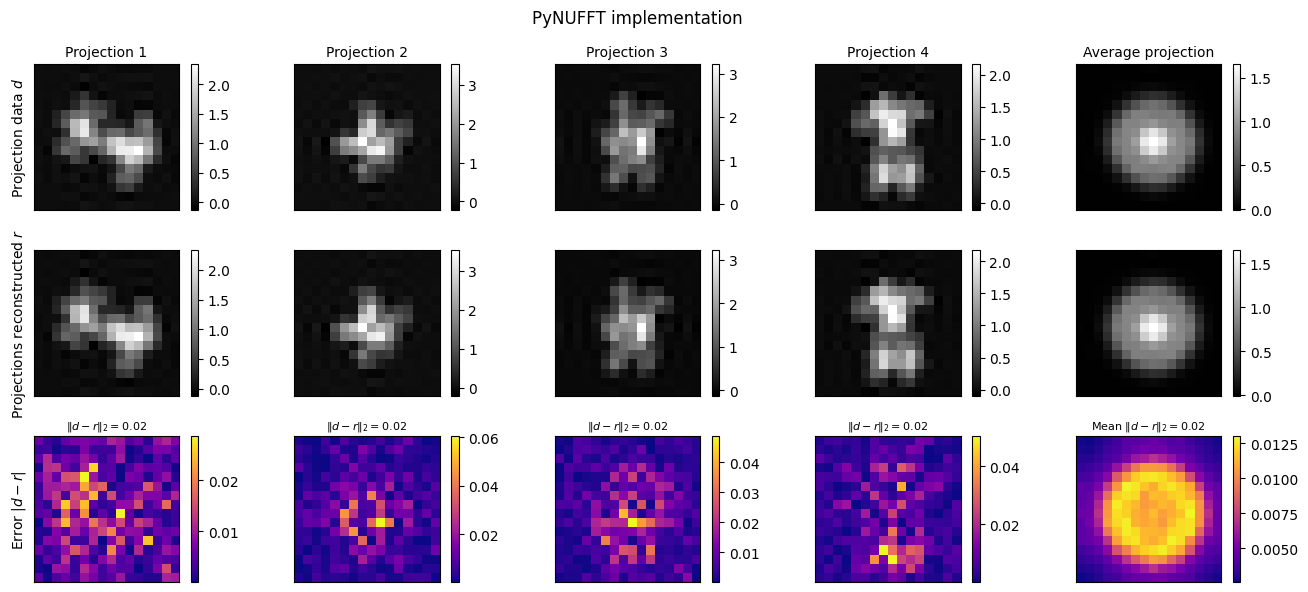

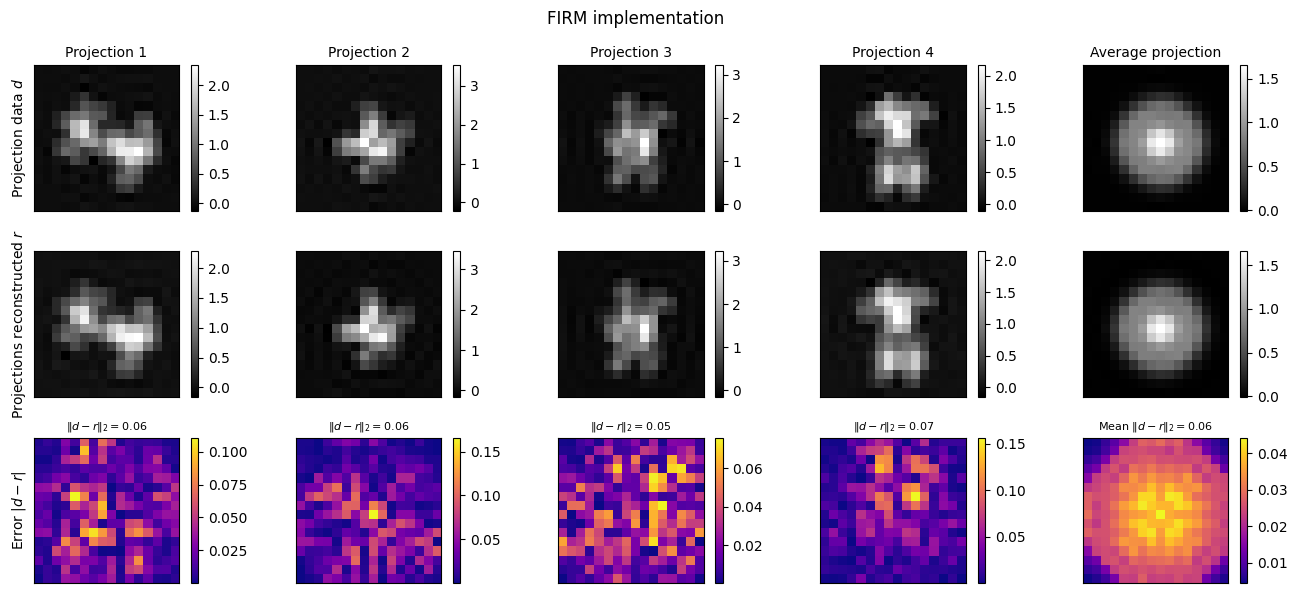

In [37]:
## Plot original projections vs projections of reconstructed volume
cut = 4
np.random.seed(12)
orient = np.random.uniform([-np.pi,-np.pi/2,-np.pi],[np.pi,np.pi/2,np.pi],size=(1000,3))
projections = Projector(data,orient).project()
recon_projections = Projector(recon_fm,orient).project()
reconFIRM_projections = reconFIRM.project(Projector.rotation_matrices_3d(orient))._data

fig, ax = plt.subplots(3,cut+1,figsize=(13.5,6))
plt.suptitle("PyNUFFT implementation")
for i in range(cut+1):
    if i<cut:
        Id = ax[0,i].imshow(projections[i], cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(recon_projections[i], cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(projections[i]-recon_projections[i]),cmap='plasma'); plt.colorbar(Ie,ax=ax[2,i])
        ax[0,i].set_title(fr"Projection {i+1}",fontsize=10)
        ax[2,i].set_title(fr"$\|d-r\|_2=${np.linalg.norm(projections[i]-recon_projections[i])/np.linalg.norm(projections[i]):1.2f}",fontsize=8)
    else:
        Id = ax[0,i].imshow(projections.mean(axis=0), cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(recon_projections.mean(axis=0), cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(projections-recon_projections).mean(axis=0),cmap='plasma'); plt.colorbar(Ie,ax=ax[2,i])
        ax[0,i].set_title(fr"Average projection",fontsize=10)
        ax[2,i].set_title(fr"Mean $\|d-r\|_2=${(np.linalg.norm(projections-recon_projections,axis=(-2,-1))/np.linalg.norm(projections,axis=(-2,-1))).mean():1.2f}",fontsize=8)
    for j in range(3):
        ax[j,i].set_xticks([]); ax[j,i].set_yticks([])
ax[0,0].set_ylabel("Projection data $d$")
ax[1,0].set_ylabel("Projections reconstructed $r$")
ax[2,0].set_ylabel("Error $|d-r|$")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(3,cut+1,figsize=(13.5,6))
plt.suptitle("FIRM implementation")
for i in range(cut+1):
    if i<cut:
        Id = ax[0,i].imshow(projections[i], cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(reconFIRM_projections[i], cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(projections[i]-reconFIRM_projections[i]),cmap='plasma'); plt.colorbar(Ie,ax=ax[2,i])
        ax[0,i].set_title(fr"Projection {i+1}",fontsize=10)
        ax[2,i].set_title(fr"$\|d-r\|_2=${np.linalg.norm(projections[i]-reconFIRM_projections[i])/np.linalg.norm(projections[i]):1.2f}",fontsize=8)
    else:
        Id = ax[0,i].imshow(projections.mean(axis=0), cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(reconFIRM_projections.mean(axis=0), cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(projections-reconFIRM_projections).mean(axis=0),cmap='plasma'); plt.colorbar(Ie,ax=ax[2,i])
        ax[0,i].set_title(fr"Average projection",fontsize=10)
        ax[2,i].set_title(fr"Mean $\|d-r\|_2=${(np.linalg.norm(projections-reconFIRM_projections,axis=(-2,-1))/np.linalg.norm(projections,axis=(-2,-1))).mean():1.2f}",fontsize=8)
    for j in range(3):
        ax[j,i].set_xticks([]); ax[j,i].set_yticks([])
ax[0,0].set_ylabel("Projection data $d$")
ax[1,0].set_ylabel("Projections reconstructed $r$")
ax[2,0].set_ylabel("Error $|d-r|$")
plt.tight_layout()
plt.show()

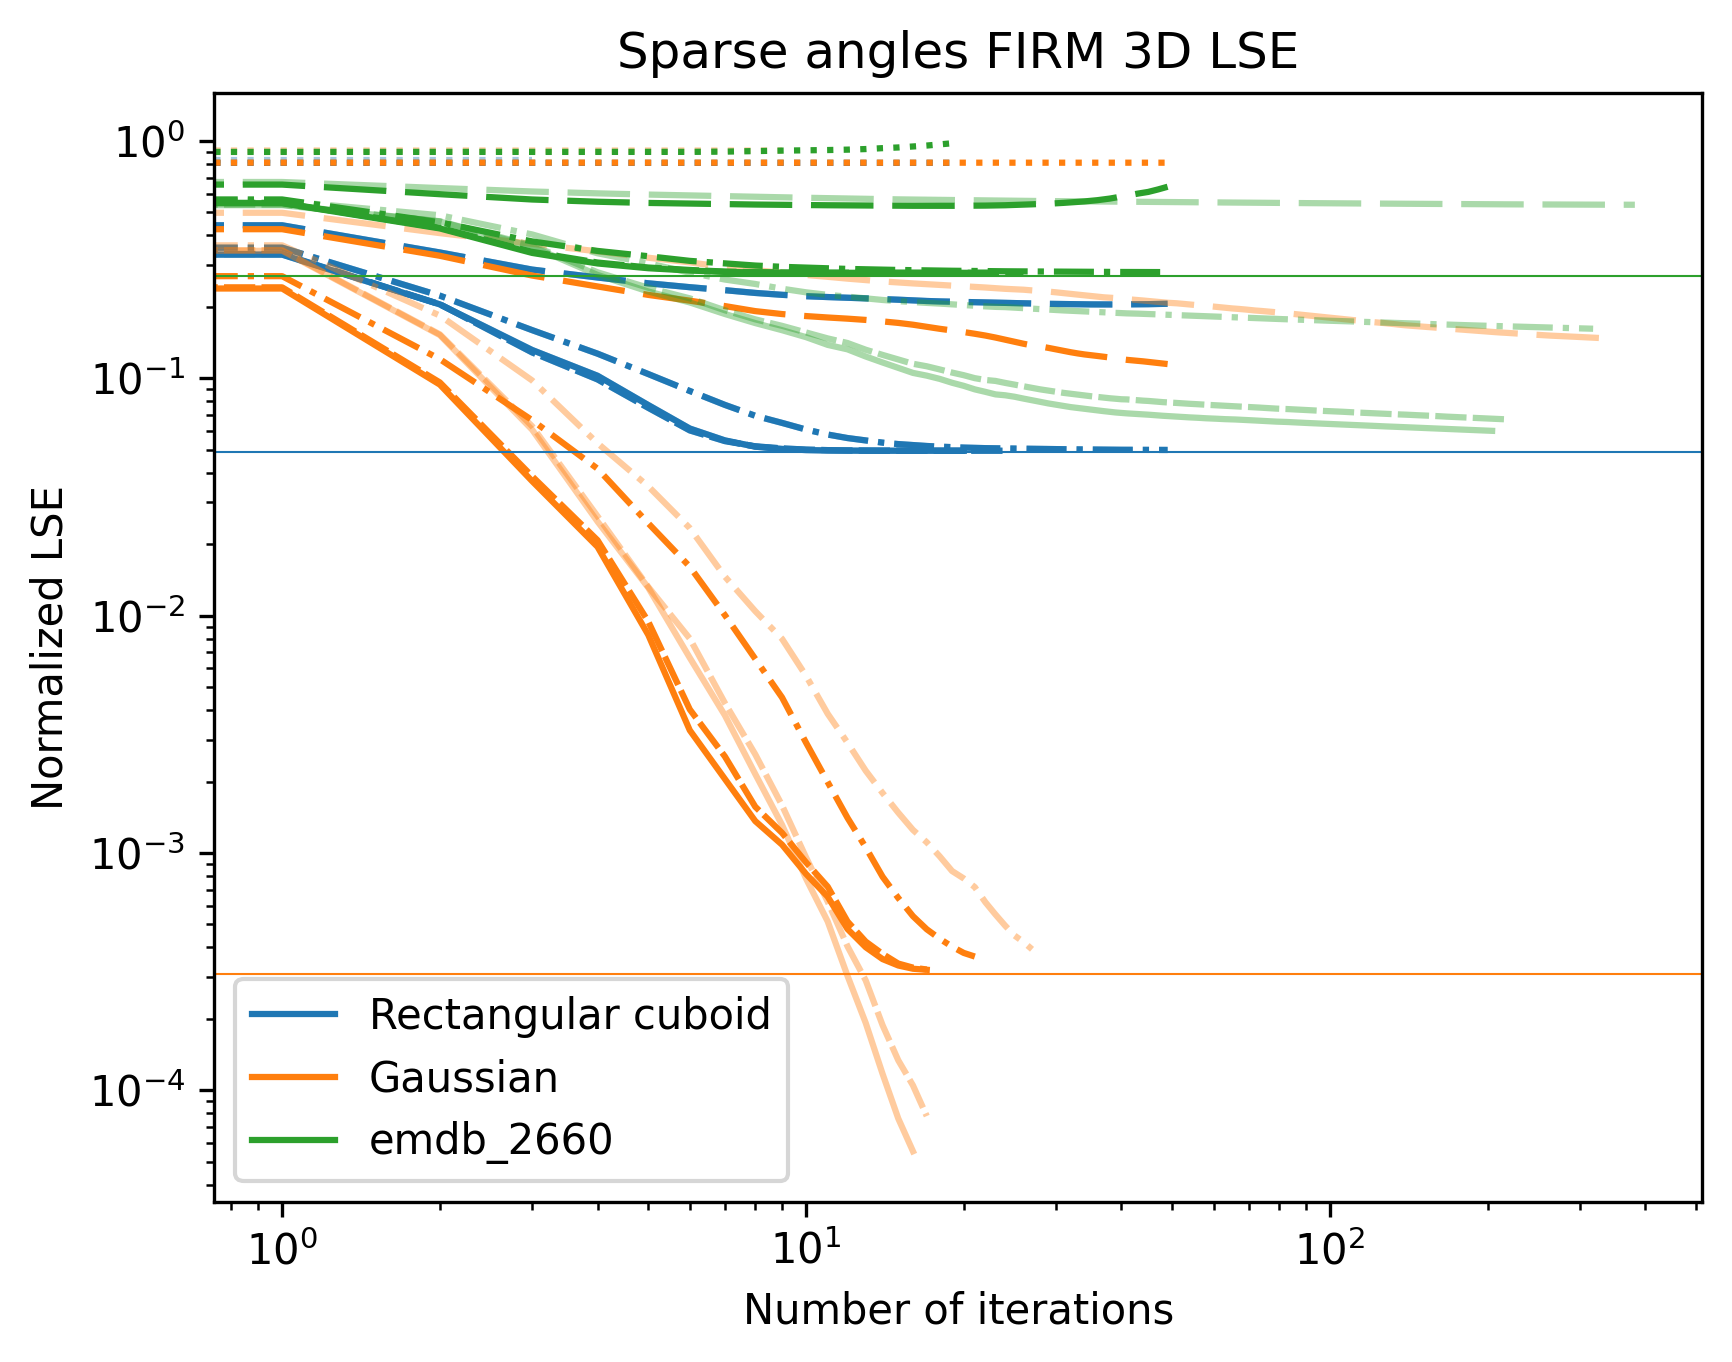

In [35]:
# WARNING: RECTOID OWN MISSING AND OVERWRITTEN BY RECTOID ASPIRE!
LSE = np.load("LSE_FIRM_Nangles.npy")
plt.figure(dpi=300)
plt.title("Sparse angles FIRM 3D LSE")
for s in range(3):
    plt.loglog(LSE[0,s,0],c=f'C{s}',ls=':',alpha=0.4)
    plt.loglog(LSE[1,s,0],c=f'C{s}',ls=':')
    plt.loglog(LSE[0,s,1],c=f'C{s}',ls=(0,(10,3)),alpha=0.4)
    plt.loglog(LSE[1,s,1],c=f'C{s}',ls=(0,(10,3)))
    plt.loglog(LSE[0,s,2],c=f'C{s}',ls='-.',alpha=0.4)
    plt.loglog(LSE[1,s,2],c=f'C{s}',ls='-.')
    plt.loglog(LSE[0,s,3],c=f'C{s}',ls=(0,(5,1)),alpha=0.4)
    plt.loglog(LSE[1,s,3],c=f'C{s}',ls=(0,(5,1)))
    plt.loglog(LSE[0,s,4],c=f'C{s}',ls='-',alpha=0.4)
    plt.loglog(LSE[1,s,4],c=f'C{s}',ls='-',label=['Rectangular cuboid','Gaussian','emdb_2660'][s])

plt.axhline(4.9e-2,lw=0.5,c='C0')
plt.axhline(3.1e-4,lw=0.5,c='C1')
plt.axhline(2.7e-1,lw=0.5,c='C2')

plt.legend()
plt.xlabel("Number of iterations")
plt.ylabel("Normalized LSE")
plt.show()

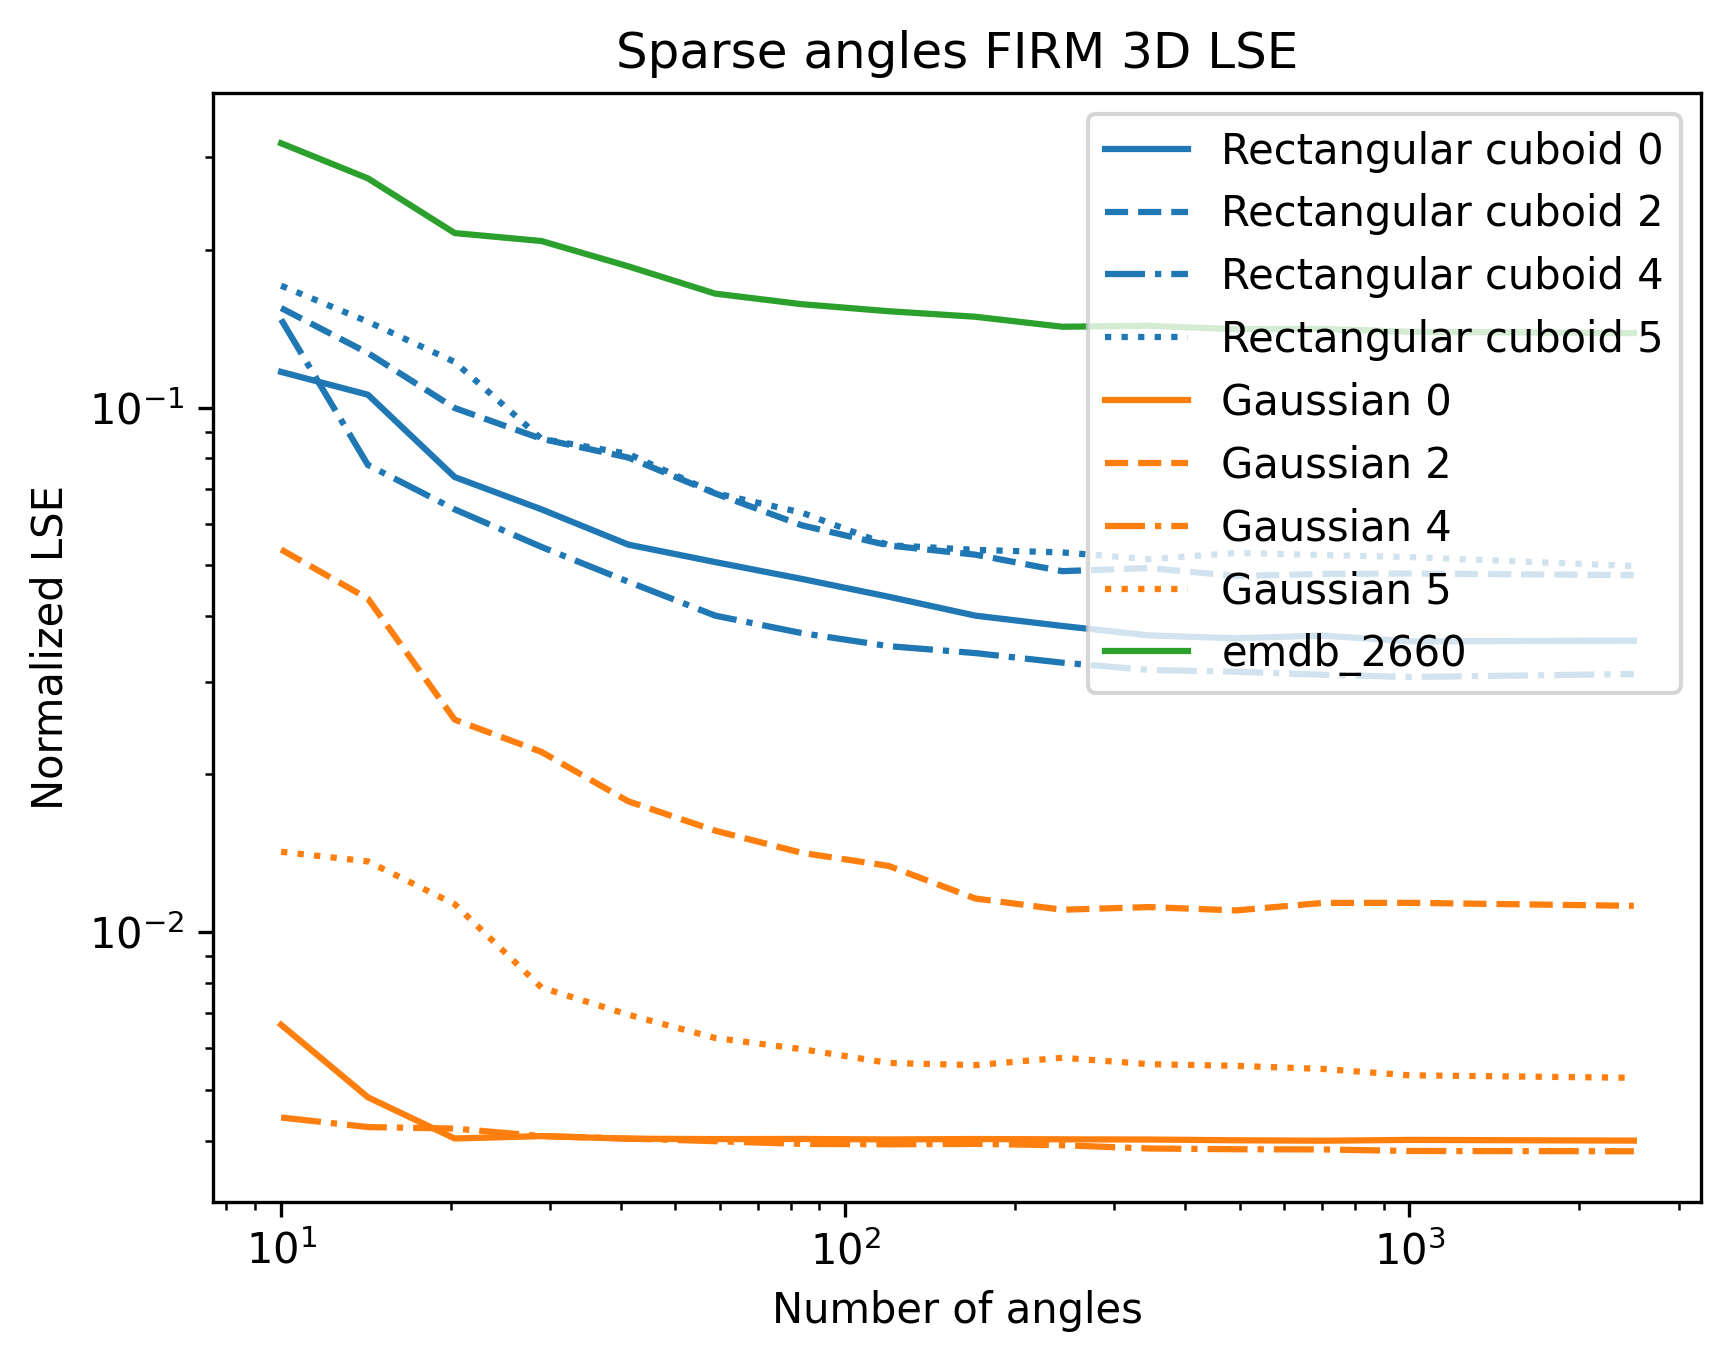

In [33]:
LSE = np.load("3Drecon_limAngles-fixed-FOV_PyNUFFT_res16_logspace1-3-17+2500+10000.npy")
LSE[2,1:] = np.nan
plt.figure(dpi=300)
plt.title("Sparse angles FIRM 3D LSE")
for n in range(3):
    for s,seed in enumerate([0,2,4,5]):
        if not np.isnan(LSE[n,s]).all():
            plt.loglog(np.append(np.logspace(1,3,14),[2500]),LSE[n,s],c=f'C{n}',ls=['-','--','-.',':'][s],label=[f'Rectangular cuboid {seed}',f'Gaussian {seed}','emdb_2660'][n])

plt.legend()
plt.xlabel("Number of angles")
plt.ylabel("Normalized LSE")
plt.show()

In [187]:
seed = 2      # Random seed
nrot = 1000    # numer of random rotations
ndim = 3       # dimensionality
np.random.seed(seed)
orientations = np.random.uniform([-np.pi,-np.pi/2,-np.pi],[np.pi,np.pi/2,np.pi],size=(nrot,3))

LSE_FIRM_res = np.zeros((2,3,5,1000))*np.nan
for s,shape in enumerate(["rect","gauss","molecule"]):
    for i,res in enumerate([4,8,16,32,64]):
        if shape in ["molecule"]:
            data = eval(f"TestData.{shape}(res)")
        else: 
            data = eval(f"TestData.{shape}(res,ndim=ndim,seed=seed)")

        R = Reconstructor(Projector(data, orientations).project(), orientations)
        _ = R.reconstruct(method='FIRM3D', maxiter=1000)
        
        src = Simulation(n=orientations.shape[0], vols=Volume(data), offsets=0, amplitudes=1, angles=orientations, seed=seed)
        E = MeanEstimator(src,maxiter=50,preconditioner=None)
        _ = E.estimate()

        lse_own = [np.linalg.norm(np.array(rec)-data)/np.linalg.norm(data) for rec in R.intermediate]
        lse_asp = [np.linalg.norm(np.array(est)-data)/np.linalg.norm(data) for est in E.intermediate]
        LSE_FIRM_res[0,s,i,:len(lse_own)] = lse_own
        LSE_FIRM_res[1,s,i,:len(lse_asp)] = lse_asp

        print(s,i,end='\r')
        
np.save("LSE_FIRM_res",LSE_FIRM_res)

C:\Users\Leon\AppData\Local\Temp\ipykernel_9956\3333131810.py:22: RuntimeWarning: invalid value encountered in scalar divide
  lse_own = [np.linalg.norm(np.array(rec)-data)/np.linalg.norm(data) for rec in R.intermediate]
C:\Users\Leon\AppData\Local\Temp\ipykernel_9956\3333131810.py:23: RuntimeWarning: invalid value encountered in scalar divide
  lse_asp = [np.linalg.norm(np.array(est)-data)/np.linalg.norm(data) for est in E.intermediate]


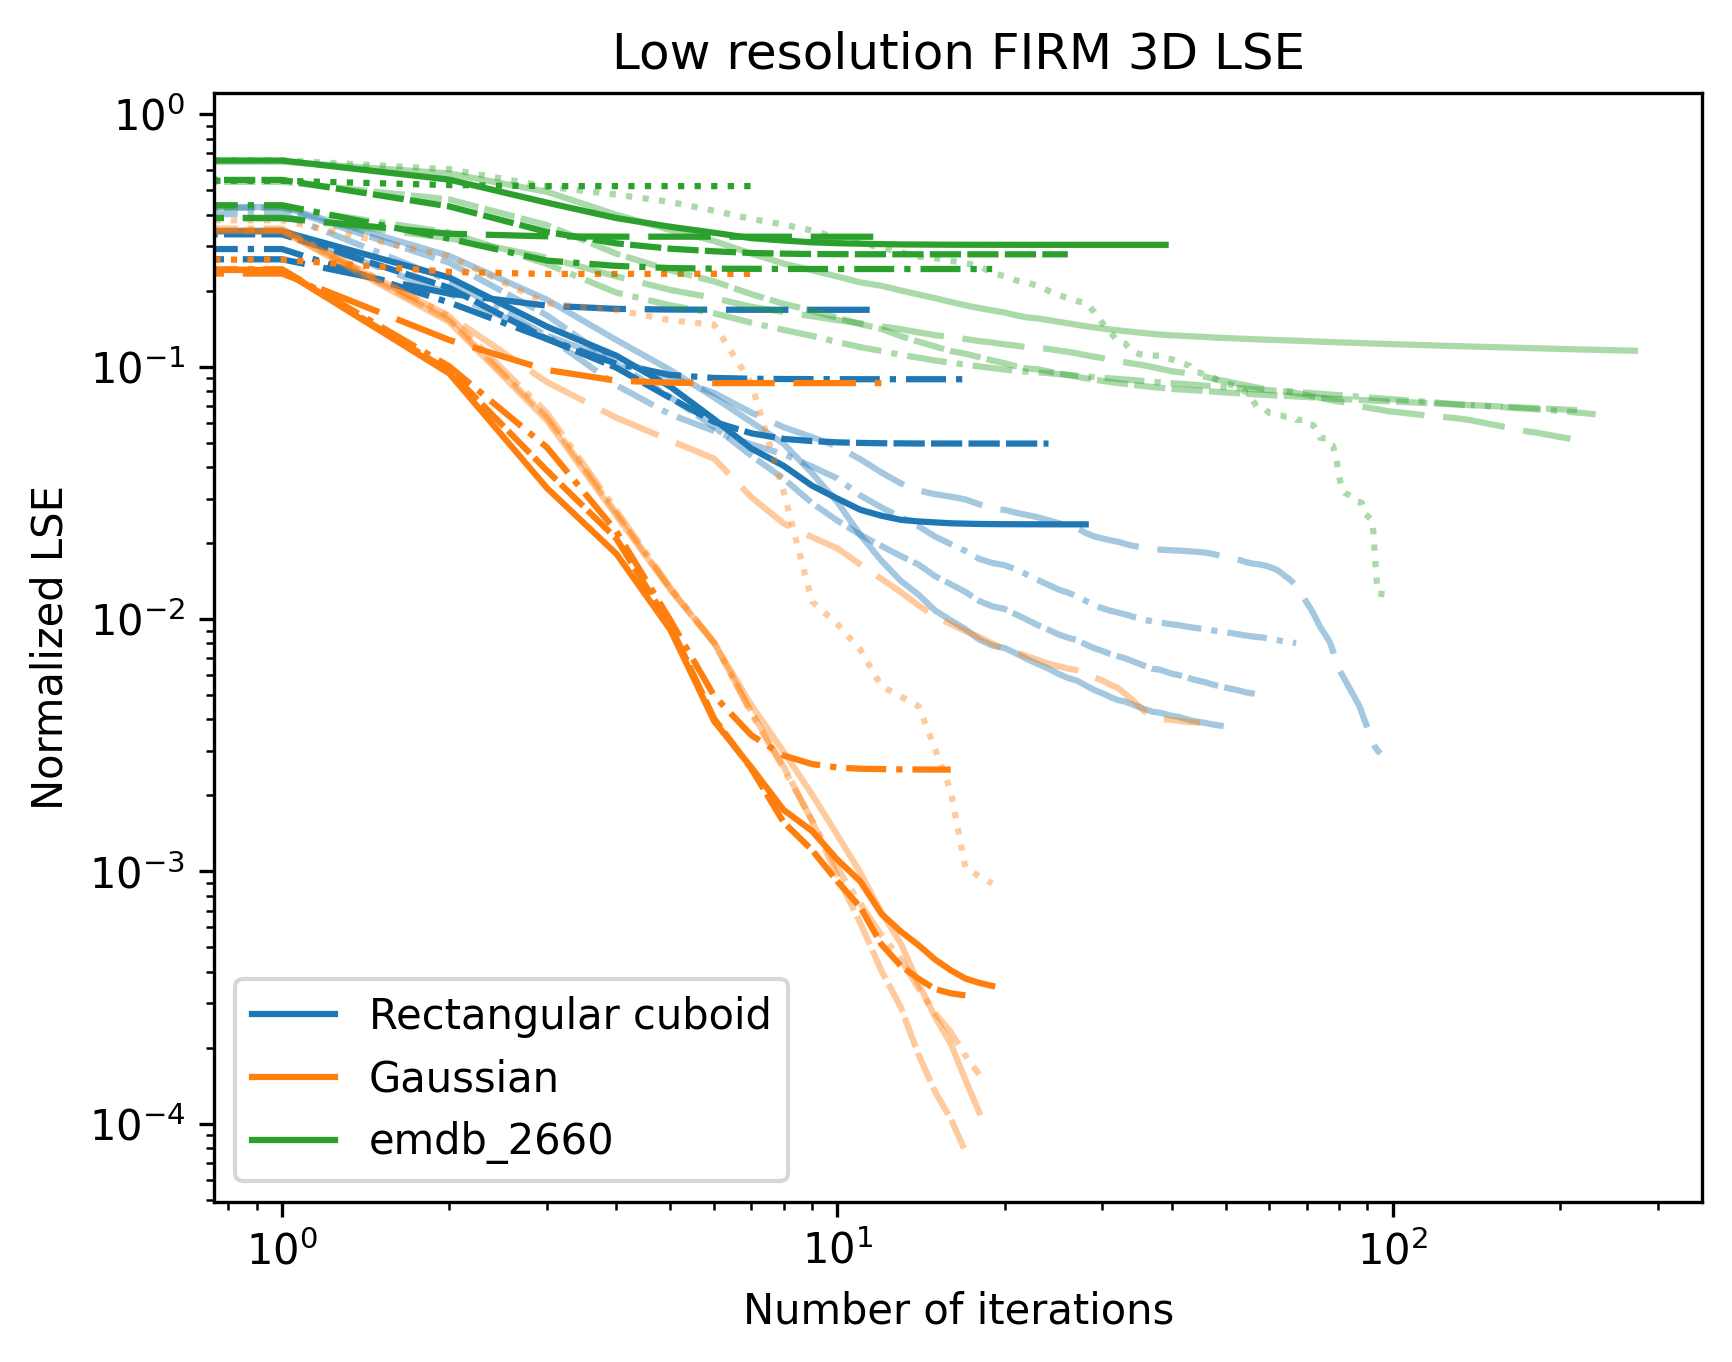

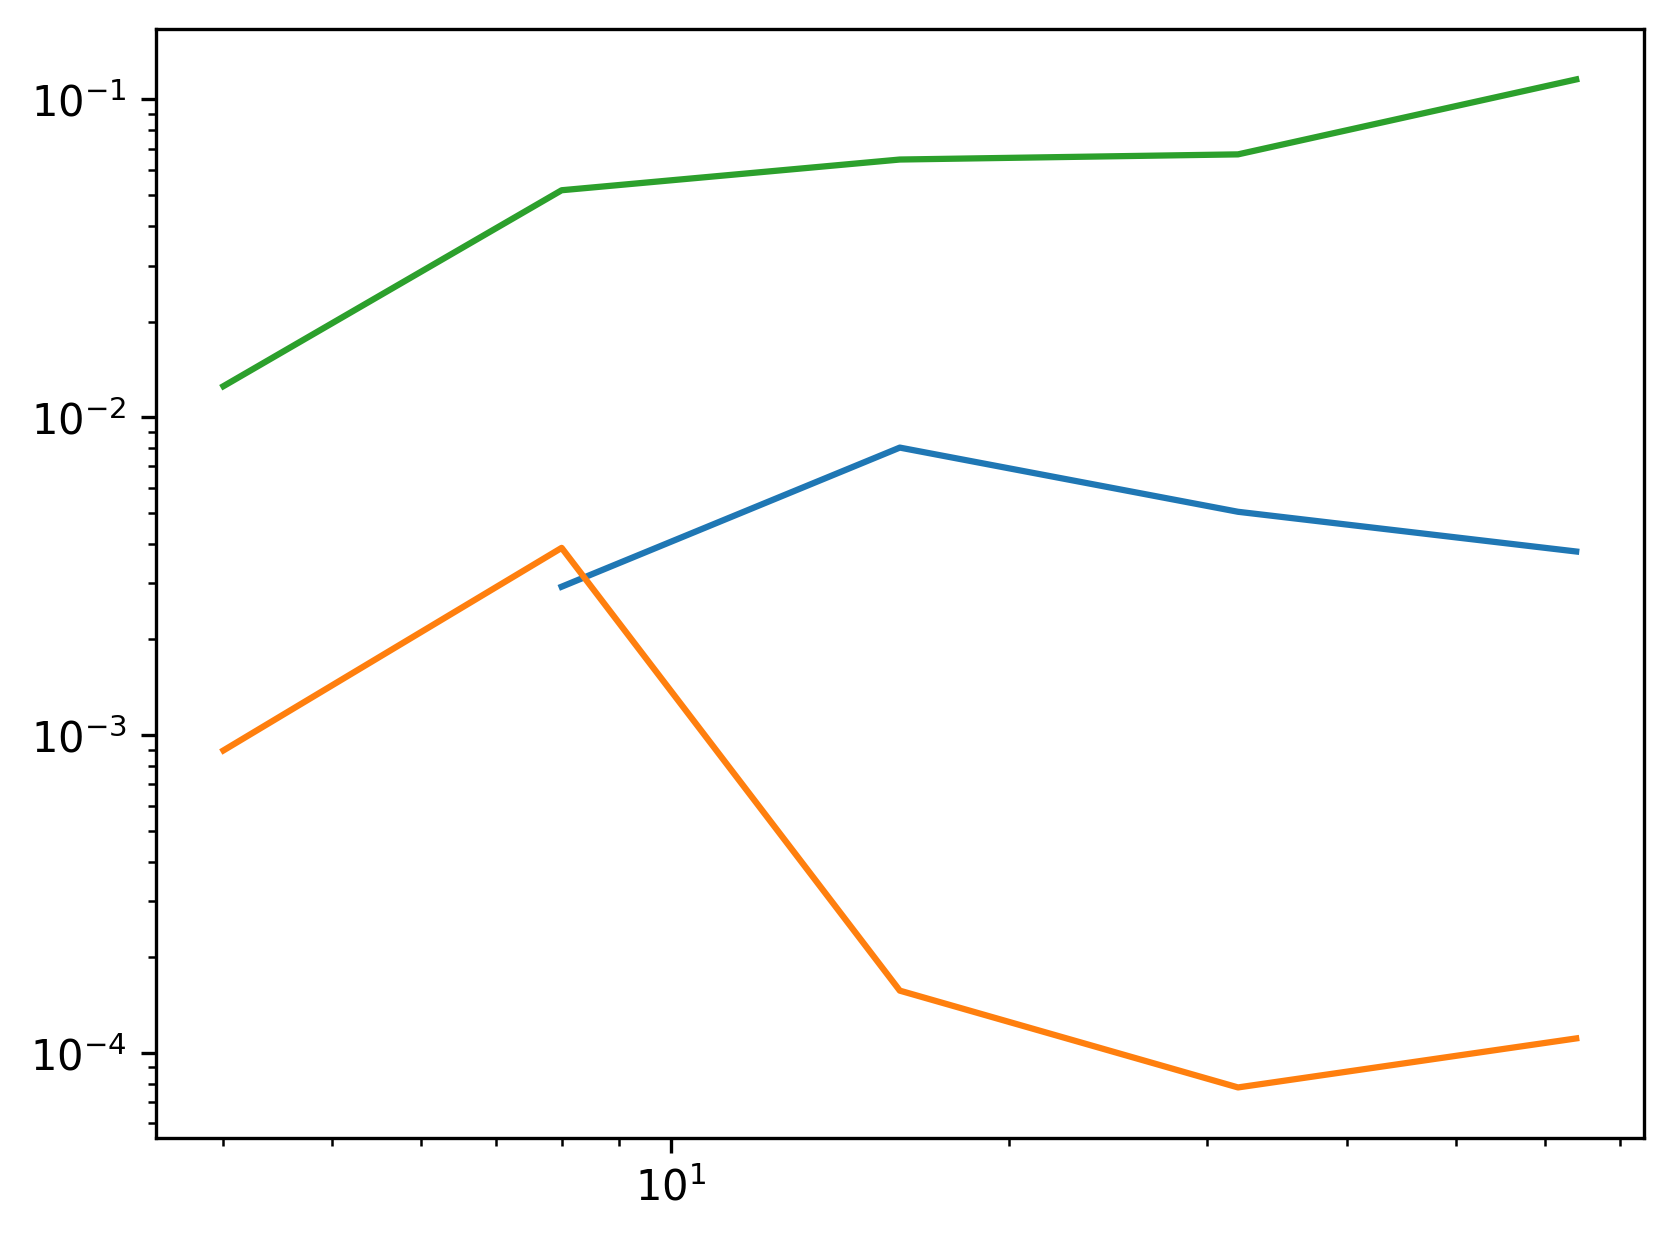

In [208]:
LSE = np.load("LSE_FIRM_res.npy")
plt.figure(dpi=300)
plt.title("Low resolution FIRM 3D LSE")
for s in range(3):
    plt.loglog(LSE[0,s,0],c=f'C{s}',ls=':',alpha=0.4)
    plt.loglog(LSE[1,s,0],c=f'C{s}',ls=':')
    plt.loglog(LSE[0,s,1],c=f'C{s}',ls=(0,(10,3)),alpha=0.4)
    plt.loglog(LSE[1,s,1],c=f'C{s}',ls=(0,(10,3)))
    plt.loglog(LSE[0,s,2],c=f'C{s}',ls='-.',alpha=0.4)
    plt.loglog(LSE[1,s,2],c=f'C{s}',ls='-.')
    plt.loglog(LSE[0,s,3],c=f'C{s}',ls=(0,(5,1)),alpha=0.4)
    plt.loglog(LSE[1,s,3],c=f'C{s}',ls=(0,(5,1)))
    plt.loglog(LSE[0,s,4],c=f'C{s}',ls='-',alpha=0.4)
    plt.loglog(LSE[1,s,4],c=f'C{s}',ls='-',label=['Rectangular cuboid','Gaussian','emdb_2660'][s])

#plt.axhline(4.9e-2,lw=0.5,c='C0')
#plt.axhline(3.1e-4,lw=0.5,c='C1')
#plt.axhline(2.7e-1,lw=0.5,c='C2')

plt.legend()
plt.xlabel("Number of iterations")
plt.ylabel("Normalized LSE")
plt.show()

plt.figure(dpi=300)
for s in range(3):
    lses = []
    for lse in LSE[0,s]:
        try: lses.append(lse[~np.isnan(lse)][-1])
        except: lses.append(np.nan)
    plt.loglog([4,8,16,32,64],lses)
plt.show()

### Bias-variance trade-off

In [51]:
from aspire.noise import WhiteNoiseAdder

delta = 1.01
np.random.seed(42)

src_delta = Simulation(n=orientations.shape[0], vols=Volume(data), offsets=0, amplitudes=1, 
                       angles=orientations, seed=seed, noise_adder=WhiteNoiseAdder(delta,seed))
E_delta = MeanEstimator(src_delta,preconditioner="circulant")
reconFIRM_delta = E_delta.estimate(regularizer=0)

2024-05-21 16:05:11,429 INFO [aspire.source.image] Creating Simulation with 1000 images.
2024-05-21 16:05:11,445 INFO [aspire.source.simulation] Appending WhiteNoiseAdder with variance=1.01 to generation pipeline
2024-05-21 16:05:11,445 INFO [aspire.reconstruction.estimator] {self.__class__.__name__} instantiating default basis.
2024-05-21 16:05:11,445 INFO [aspire.basis.ffb_3d] Expanding 3D map in a frequency-domain Fourier–Bessel basis using the fast method.
2024-05-21 16:05:13,250 INFO [aspire.reconstruction.mean] Determined weighted adjoint mappings. Shape = (1, 1008)
2024-05-21 16:05:13,250 INFO [aspire.reconstruction.estimator] Computing kernel
2024-05-21 16:05:13,350 INFO [aspire.reconstruction.mean] Computing non-centered Fourier Transform Kernel Mat
2024-05-21 16:05:13,366 INFO [aspire.reconstruction.estimator] Computing Preconditioner kernel
2024-05-21 16:05:13,366 INFO [aspire.reconstruction.kernel] Circularizing kernel
2024-05-21 16:05:13,366 INFO [aspire.reconstruction.ker

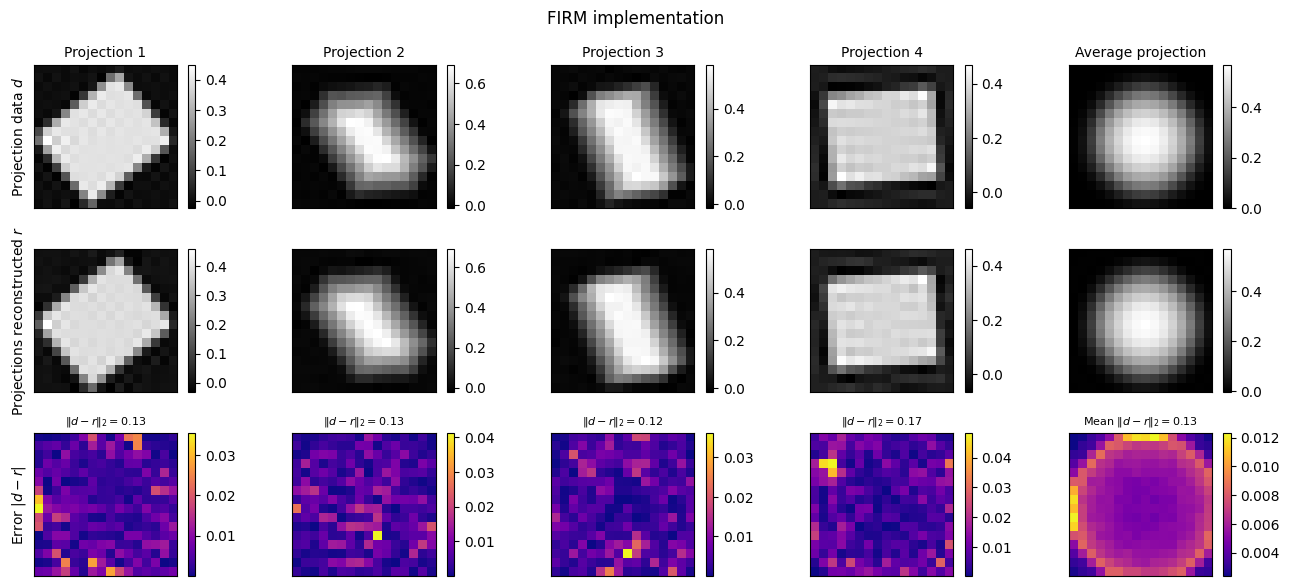

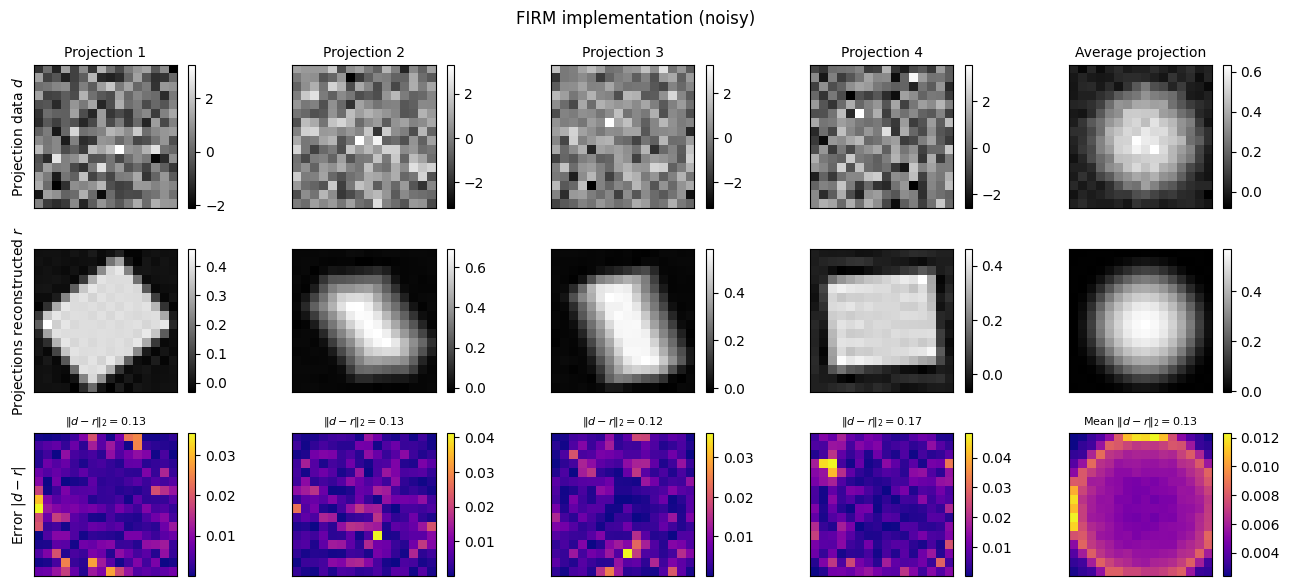

In [52]:
cut = 4
projections = src.images[:]._data
projections_delta = src_delta.images[:]._data
reconFIRM_projections = reconFIRM.project(Projector.rotation_matrices_3d(orientations))._data
reconFIRM_delta_projections = reconFIRM.project(Projector.rotation_matrices_3d(orientations))._data

fig, ax = plt.subplots(3,cut+1,figsize=(13.5,6))
plt.suptitle("FIRM implementation")
for i in range(cut+1):
    if i<cut:
        Id = ax[0,i].imshow(projections[i], cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(reconFIRM_projections[i], cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(projections[i]-reconFIRM_projections[i]),cmap='plasma'); plt.colorbar(Ie,ax=ax[2,i])
        ax[0,i].set_title(fr"Projection {i+1}",fontsize=10)
        ax[2,i].set_title(fr"$\|d-r\|_2=${np.linalg.norm(projections[i]-reconFIRM_projections[i])/np.linalg.norm(projections[i]):1.2f}",fontsize=8)
    else:
        Id = ax[0,i].imshow(projections.mean(axis=0), cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(reconFIRM_projections.mean(axis=0), cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(projections-reconFIRM_projections).mean(axis=0),cmap='plasma'); plt.colorbar(Ie,ax=ax[2,i])
        ax[0,i].set_title(fr"Average projection",fontsize=10)
        ax[2,i].set_title(fr"Mean $\|d-r\|_2=${(np.linalg.norm(projections-reconFIRM_projections,axis=(-2,-1))/np.linalg.norm(projections,axis=(-2,-1))).mean():1.2f}",fontsize=8)
    for j in range(3):
        ax[j,i].set_xticks([]); ax[j,i].set_yticks([])
ax[0,0].set_ylabel("Projection data $d$")
ax[1,0].set_ylabel("Projections reconstructed $r$")
ax[2,0].set_ylabel("Error $|d-r|$")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(3,cut+1,figsize=(13.5,6))
plt.suptitle("FIRM implementation (noisy)")
for i in range(cut+1):
    if i<cut:
        Id = ax[0,i].imshow(projections_delta[i], cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(reconFIRM_delta_projections[i], cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(projections[i]-reconFIRM_delta_projections[i]),cmap='plasma'); plt.colorbar(Ie,ax=ax[2,i])
        ax[0,i].set_title(fr"Projection {i+1}",fontsize=10)
        ax[2,i].set_title(fr"$\|d-r\|_2=${np.linalg.norm(projections[i]-reconFIRM_delta_projections[i])/np.linalg.norm(projections[i]):1.2f}",fontsize=8)
    else:
        Id = ax[0,i].imshow(projections_delta.mean(axis=0), cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(reconFIRM_delta_projections.mean(axis=0), cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(projections-reconFIRM_delta_projections).mean(axis=0),cmap='plasma'); plt.colorbar(Ie,ax=ax[2,i])
        ax[0,i].set_title(fr"Average projection",fontsize=10)
        ax[2,i].set_title(fr"Mean $\|d-r\|_2=${(np.linalg.norm(projections-reconFIRM_delta_projections,axis=(-2,-1))/np.linalg.norm(projections,axis=(-2,-1))).mean():1.2f}",fontsize=8)
    for j in range(3):
        ax[j,i].set_xticks([]); ax[j,i].set_yticks([])
ax[0,0].set_ylabel("Projection data $d$")
ax[1,0].set_ylabel("Projections reconstructed $r$")
ax[2,0].set_ylabel("Error $|d-r|$")
plt.tight_layout()
plt.show()

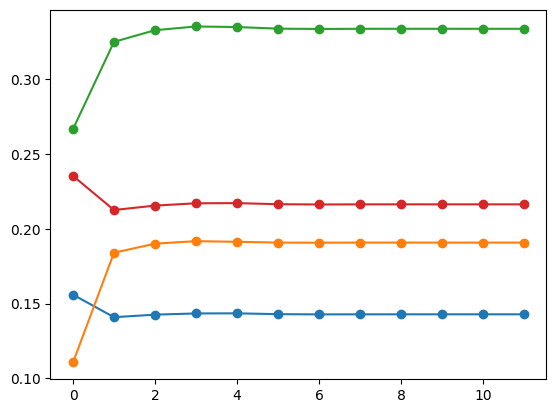

In [58]:
Bias = np.mean(np.abs(np.array(E_delta.intermediate) - np.array(estimator.intermediate)[-1]),axis=(1,2,3))
Variance = np.array(E_delta.intermediate).var(axis=(1,2,3))
LSE = np.sqrt(np.mean(np.square(E_delta.intermediate-data),axis=(1,2,3)))

plt.plot(Bias,'-o')
plt.plot(Variance,'-o')
plt.plot(Bias+Variance,'-o')
plt.plot(LSE,'-o')

In [82]:
delta = 1.01
np.random.seed(seed)
P = Projector(data, orientations).project()
P_delta = P + np.random.uniform(-2*delta,2*delta,size=projections.shape)

# Reconstruct volume from projections
R = Reconstructor(P, orientations)
recon = R.reconstruct(method='PyNUFFTcg', KSOR=1.2, IS=6, maxiter=50)
R_delta = Reconstructor(P_delta, orientations)
recon_delta = R_delta.reconstruct(method='PyNUFFTcg', KSOR=1.2, IS=6, maxiter=50)

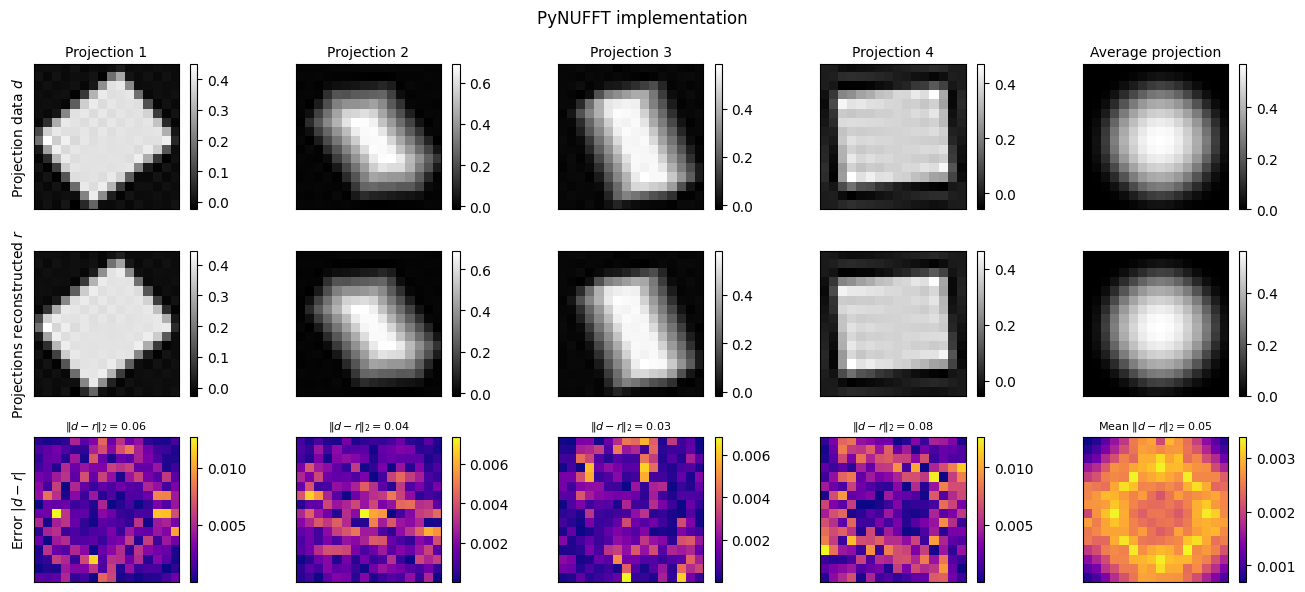

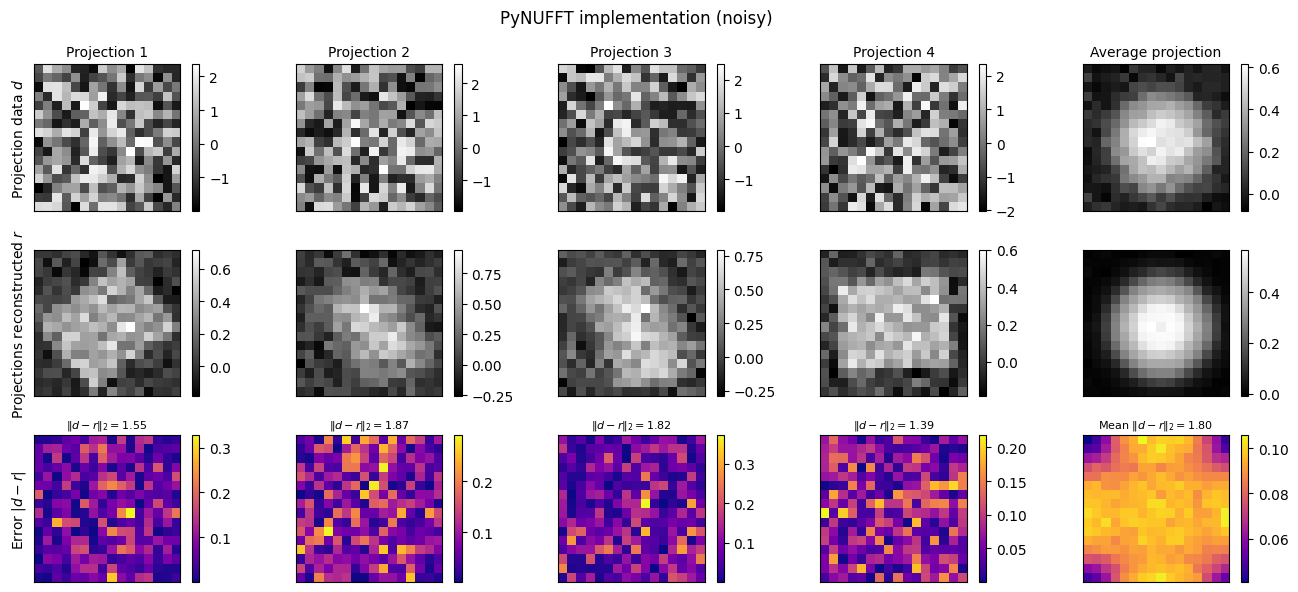

In [83]:
## Plot original projections vs projections of reconstructed volume
cut = 4
recon_projections = Projector(recon,orientations).project()
recon_delta_projections = Projector(recon_delta,orientations).project()

fig, ax = plt.subplots(3,cut+1,figsize=(13.5,6))
plt.suptitle("PyNUFFT implementation")
for i in range(cut+1):
    if i<cut:
        Id = ax[0,i].imshow(P[i], cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(recon_projections[i], cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(P[i]-recon_projections[i]),cmap='plasma'); plt.colorbar(Ie,ax=ax[2,i])
        ax[0,i].set_title(fr"Projection {i+1}",fontsize=10)
        ax[2,i].set_title(fr"$\|d-r\|_2=${np.linalg.norm(P[i]-recon_projections[i])/np.linalg.norm(P[i]):1.2f}",fontsize=8)
    else:
        Id = ax[0,i].imshow(P.mean(axis=0), cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(recon_projections.mean(axis=0), cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(P-recon_projections).mean(axis=0),cmap='plasma'); plt.colorbar(Ie,ax=ax[2,i])
        ax[0,i].set_title(fr"Average projection",fontsize=10)
        ax[2,i].set_title(fr"Mean $\|d-r\|_2=${(np.linalg.norm(P-recon_projections,axis=(-2,-1))/np.linalg.norm(P,axis=(-2,-1))).mean():1.2f}",fontsize=8)
    for j in range(3):
        ax[j,i].set_xticks([]); ax[j,i].set_yticks([])
ax[0,0].set_ylabel("Projection data $d$")
ax[1,0].set_ylabel("Projections reconstructed $r$")
ax[2,0].set_ylabel("Error $|d-r|$")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(3,cut+1,figsize=(13.5,6))
plt.suptitle("PyNUFFT implementation (noisy)")
for i in range(cut+1):
    if i<cut:
        Id = ax[0,i].imshow(P_delta[i], cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(recon_delta_projections[i], cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(P[i]-recon_delta_projections[i]),cmap='plasma'); plt.colorbar(Ie,ax=ax[2,i])
        ax[0,i].set_title(fr"Projection {i+1}",fontsize=10)
        ax[2,i].set_title(fr"$\|d-r\|_2=${np.linalg.norm(P[i]-recon_delta_projections[i])/np.linalg.norm(P[i]):1.2f}",fontsize=8)
    else:
        Id = ax[0,i].imshow(P_delta.mean(axis=0), cmap="gray"); plt.colorbar(Id,ax=ax[0,i])
        Ir = ax[1,i].imshow(recon_delta_projections.mean(axis=0), cmap="gray"); plt.colorbar(Ir,ax=ax[1,i])
        Ie = ax[2,i].imshow(np.abs(P-recon_delta_projections).mean(axis=0),cmap='plasma'); plt.colorbar(Ie,ax=ax[2,i])
        ax[0,i].set_title(fr"Average projection",fontsize=10)
        ax[2,i].set_title(fr"Mean $\|d-r\|_2=${(np.linalg.norm(P-recon_delta_projections,axis=(-2,-1))/np.linalg.norm(P,axis=(-2,-1))).mean():1.2f}",fontsize=8)
    for j in range(3):
        ax[j,i].set_xticks([]); ax[j,i].set_yticks([])
ax[0,0].set_ylabel("Projection data $d$")
ax[1,0].set_ylabel("Projections reconstructed $r$")
ax[2,0].set_ylabel("Error $|d-r|$")
plt.tight_layout()
plt.show()